In [ ]:
p!pip install pystan~=2.14
!pip install fbprophet

In [ ]:
!pip install darts

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as tf
from fbprophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from tensorflow.keras.models import load_model

### **My Goal is to Single Forecast the next value in the sequence, for temperature, wind, dew point, wind speed, wind deg and other columns, So i can build the Machine learning Model for predicting the Weather Type for upcoming timestamps, So for that need those values for future timestamp. Using VAR or LSTM, trying to Forecast these values**

## Loading Data

In [ ]:
df_2021 = pd.read_csv("/content/bangalore_weather_data_from_jan_to_dec_2021.csv", parse_dates=["dt"], index_col="dt")
df_2022 = pd.read_csv("/content/bangalore_weather_data_from_jan_to_sep_2022.csv", parse_dates=["dt"], index_col="dt")

**This Dataset contains data from jan1 2021 - dec31 2021 with the interval time of 1 hour.**

In [ ]:
df_2021

lat     lon      timezone  timezone_offset     sunrise  \
dt                                                                          
2021-01-01:01  12.9989  77.592  Asia/Kolkata            19800  1609463506   
2021-01-01:02  12.9989  77.592  Asia/Kolkata            19800  1609463506   
2021-01-01:03  12.9989  77.592  Asia/Kolkata            19800  1609463506   
2021-01-01:04  12.9989  77.592  Asia/Kolkata            19800  1609463506   
2021-01-01:05  12.9989  77.592  Asia/Kolkata            19800  1609463506   
...                ...     ...           ...              ...         ...   
2022-01-21:23  12.9989  77.592  Asia/Kolkata            19800  1642727775   
2022-01-22:00  12.9989  77.592  Asia/Kolkata            19800  1642814178   
2022-01-22:01  12.9989  77.592  Asia/Kolkata            19800  1642814178   
2022-01-22:02  12.9989  77.592  Asia/Kolkata            19800  1642814178   
2022-01-22:03  12.9989  77.592  Asia/Kolkata            19800  1642814178   

                   sunset    temp  feels_like  pressure  humidity  dew_point  \
dt                                                                             
2021-01-01:01  1609504453  291.23      291.60      1015        96     290.58   
2021-01-01:02  1609504453  291.87      291.99      1013        84     289.11   
2021-01-01:03  1609504453  291.25      291.54      1014        93     290.10   
2021-01-01:04  1609504453  291.51      291.75      1014        90     289.84   
2021-01-01:05  1609504453  290.70      290.94      1013        93     289.56   
...                   ...     ...         ...       ...       ...        ...   
2022-01-21:23  1642769103  297.99      297.86       915        51     287.17   
2022-01-22:00  1642855534  293.86      293.42      1012        55     284.50   
2022-01-22:01  1642855534  292.71      292.29      1012        60     284.74   
2022-01-22:02  1642855534  292.48      292.04      1011        60     284.53   
2022-01-22:03  1642855534  292.47      292.05      1011        61     284.77   

               clouds  wind_speed  wind_deg   id    main      description icon  
dt                                                                              
2021-01-01:01      89        3.26        84  804  Clouds  overcast clouds  04n  
2021-01-01:02      20        0.00         0  801  Clouds       few clouds  02n  
2021-01-01:03     100        2.75        83  804  Clouds  overcast clouds  04n  
2021-01-01:04     100        3.48        80  804  Clouds  overcast clouds  04n  
2021-01-01:05      20        1.00        50  701    Mist             mist  50n  
...               ...         ...       ...  ...     ...              ...  ...  
2022-01-21:23      85        1.31        49  804  Clouds  overcast clouds  04n  
2022-01-22:00      86        0.94        55  804  Clouds  overcast clouds  04n  
2022-01-22:01      84        0.66        71  803  Clouds    broken clouds  04n  
2022-01-22:02      74        0.82       132  803  Clouds    broken clouds  04n  
2022-01-22:03      19        1.47       189  801  Clouds       few clouds  02n  

[9756 rows x 18 columns]

**This Dataset contains data from jan1 2022 - sep10 2022 with the interval time of 1 hour.**

In [ ]:
df_2022

lat     lon      timezone  timezone_offset     sunrise  \
dt                                                                          
2022-01-01:01  12.9989  77.592  Asia/Kolkata            19800  1640999500   
2022-01-01:02  12.9989  77.592  Asia/Kolkata            19800  1640999500   
2022-01-01:03  12.9989  77.592  Asia/Kolkata            19800  1640999500   
2022-01-01:04  12.9989  77.592  Asia/Kolkata            19800  1640999500   
2022-01-01:05  12.9989  77.592  Asia/Kolkata            19800  1640999500   
...                ...     ...           ...              ...         ...   
2022-09-10:02  12.9989  77.592  Asia/Kolkata            19800  1662770331   
2022-09-10:03  12.9989  77.592  Asia/Kolkata            19800  1662770331   
2022-09-10:04  12.9989  77.592  Asia/Kolkata            19800  1662770331   
2022-09-10:05  12.9989  77.592  Asia/Kolkata            19800  1662770331   
2022-09-10:06  12.9989  77.592  Asia/Kolkata            19800  1662770331   

                   sunset    temp  feels_like  pressure  humidity  dew_point  \
dt                                                                             
2022-01-01:01  1641040444  292.19      291.93      1018        68     286.15   
2022-01-01:02  1641040444  292.20      291.91      1017        67     285.94   
2022-01-01:03  1641040444  292.22      291.96      1017        68     286.18   
2022-01-01:04  1641040444  292.25      291.99      1017        68     286.21   
2022-01-01:05  1641040444  292.71      292.86      1019        82     289.56   
...                   ...     ...         ...       ...       ...        ...   
2022-09-10:02  1662814501  293.03      293.53      1006        94     292.04   
2022-09-10:03  1662814501  293.03      293.53      1006        94     292.04   
2022-09-10:04  1662814501  293.10      293.55      1007        92     291.76   
2022-09-10:05  1662814501  293.10      293.55      1007        92     291.76   
2022-09-10:06  1662814501  293.10      293.55      1007        92     291.76   

               clouds  wind_speed  wind_deg   id    main       description  \
dt                                                                           
2022-01-01:01     100        3.47        79  804  Clouds   overcast clouds   
2022-01-01:02     100        3.29        74  804  Clouds   overcast clouds   
2022-01-01:03      69        3.72        77  803  Clouds     broken clouds   
2022-01-01:04      85        3.67        74  804  Clouds   overcast clouds   
2022-01-01:05      40        2.57        90  802  Clouds  scattered clouds   
...               ...         ...       ...  ...     ...               ...   
2022-09-10:02     100        7.30       229  500    Rain        light rain   
2022-09-10:03     100        7.30       229  500    Rain        light rain   
2022-09-10:04     100        7.27       234  500    Rain        light rain   
2022-09-10:05     100        7.27       234  500    Rain        light rain   
2022-09-10:06     100        7.27       234  500    Rain        light rain   

              icon  
dt                  
2022-01-01:01  04n  
2022-01-01:02  04n  
2022-01-01:03  04n  
2022-01-01:04  04n  
2022-01-01:05  03n  
...            ...  
2022-09-10:02  10n  
2022-09-10:03  10n  
2022-09-10:04  10n  
2022-09-10:05  10n  
2022-09-10:06  10d  

[6558 rows x 18 columns]

In [ ]:
# combining the dataset

df = pd.concat([df_2021, df_2022], axis=0)

*Neraly 16,000+ datapoints, it is enough to fit a time series model, to predict the next value in the sequence*

In [ ]:
df

lat     lon      timezone  timezone_offset     sunrise  \
dt                                                                          
2021-01-01:01  12.9989  77.592  Asia/Kolkata            19800  1609463506   
2021-01-01:02  12.9989  77.592  Asia/Kolkata            19800  1609463506   
2021-01-01:03  12.9989  77.592  Asia/Kolkata            19800  1609463506   
2021-01-01:04  12.9989  77.592  Asia/Kolkata            19800  1609463506   
2021-01-01:05  12.9989  77.592  Asia/Kolkata            19800  1609463506   
...                ...     ...           ...              ...         ...   
2022-09-10:02  12.9989  77.592  Asia/Kolkata            19800  1662770331   
2022-09-10:03  12.9989  77.592  Asia/Kolkata            19800  1662770331   
2022-09-10:04  12.9989  77.592  Asia/Kolkata            19800  1662770331   
2022-09-10:05  12.9989  77.592  Asia/Kolkata            19800  1662770331   
2022-09-10:06  12.9989  77.592  Asia/Kolkata            19800  1662770331   

                   sunset    temp  feels_like  pressure  humidity  dew_point  \
dt                                                                             
2021-01-01:01  1609504453  291.23      291.60      1015        96     290.58   
2021-01-01:02  1609504453  291.87      291.99      1013        84     289.11   
2021-01-01:03  1609504453  291.25      291.54      1014        93     290.10   
2021-01-01:04  1609504453  291.51      291.75      1014        90     289.84   
2021-01-01:05  1609504453  290.70      290.94      1013        93     289.56   
...                   ...     ...         ...       ...       ...        ...   
2022-09-10:02  1662814501  293.03      293.53      1006        94     292.04   
2022-09-10:03  1662814501  293.03      293.53      1006        94     292.04   
2022-09-10:04  1662814501  293.10      293.55      1007        92     291.76   
2022-09-10:05  1662814501  293.10      293.55      1007        92     291.76   
2022-09-10:06  1662814501  293.10      293.55      1007        92     291.76   

               clouds  wind_speed  wind_deg   id    main      description icon  
dt                                                                              
2021-01-01:01      89        3.26        84  804  Clouds  overcast clouds  04n  
2021-01-01:02      20        0.00         0  801  Clouds       few clouds  02n  
2021-01-01:03     100        2.75        83  804  Clouds  overcast clouds  04n  
2021-01-01:04     100        3.48        80  804  Clouds  overcast clouds  04n  
2021-01-01:05      20        1.00        50  701    Mist             mist  50n  
...               ...         ...       ...  ...     ...              ...  ...  
2022-09-10:02     100        7.30       229  500    Rain       light rain  10n  
2022-09-10:03     100        7.30       229  500    Rain       light rain  10n  
2022-09-10:04     100        7.27       234  500    Rain       light rain  10n  
2022-09-10:05     100        7.27       234  500    Rain       light rain  10n  
2022-09-10:06     100        7.27       234  500    Rain       light rain  10d  

[16314 rows x 18 columns]

In [ ]:
df.describe()

lat           lon  timezone_offset       sunrise  \
count  1.631400e+04  1.631400e+04          16314.0  1.631400e+04   
mean   1.299890e+01  7.759200e+01          19800.0  1.636428e+09   
std    1.776411e-15  1.421129e-14              0.0  1.525099e+07   
min    1.299890e+01  7.759200e+01          19800.0  1.609464e+09   
25%    1.299890e+01  7.759200e+01          19800.0  1.623112e+09   
50%    1.299890e+01  7.759200e+01          19800.0  1.637456e+09   
75%    1.299890e+01  7.759200e+01          19800.0  1.649292e+09   
max    1.299890e+01  7.759200e+01          19800.0  1.662770e+09   

             sunset          temp    feels_like      pressure      humidity  \
count  1.631400e+04  16314.000000  16314.000000  16314.000000  16314.000000   
mean   1.636472e+09    297.371491    297.711227    991.083609     68.507907   
std    1.525140e+07      3.904274      3.993601     40.982233     21.936799   
min    1.609504e+09    286.860000    286.740000    903.000000     10.000000   
25%    1.623158e+09    294.520000    294.930000   1007.000000     52.000000   
50%    1.637497e+09    296.860000    297.010000   1011.000000     70.000000   
75%    1.649336e+09    300.190000    300.527500   1014.000000     88.000000   
max    1.662815e+09    308.860000    312.260000   1022.000000    100.000000   

          dew_point        clouds    wind_speed      wind_deg            id  
count  16314.000000  16314.000000  16314.000000  16314.000000  16314.000000  
mean     290.210300     48.918291      3.028769    162.847677    739.680888  
std        4.169435     30.877773      1.820132    103.534392    134.316550  
min      265.320000      0.000000      0.000000      0.000000    200.000000  
25%      288.010000     20.000000      1.770000     82.000000    721.000000  
50%      291.450000     40.000000      2.730000    140.000000    802.000000  
75%      293.130000     75.000000      4.120000    260.000000    802.000000  
max      305.260000    100.000000     12.350000    360.000000    804.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16314 entries, 2021-01-01:01 to 2022-09-10:06
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              16314 non-null  float64
 1   lon              16314 non-null  float64
 2   timezone         16314 non-null  object 
 3   timezone_offset  16314 non-null  int64  
 4   sunrise          16314 non-null  int64  
 5   sunset           16314 non-null  int64  
 6   temp             16314 non-null  float64
 7   feels_like       16314 non-null  float64
 8   pressure         16314 non-null  int64  
 9   humidity         16314 non-null  int64  
 10  dew_point        16314 non-null  float64
 11  clouds           16314 non-null  int64  
 12  wind_speed       16314 non-null  float64
 13  wind_deg         16314 non-null  int64  
 14  id               16314 non-null  int64  
 15  main             16314 non-null  object 
 16  description      16314 non-null  object 
 1

### *There is no missing value in the dataset.*

In [ ]:
# Missing Values
df.isna().sum()

lat                0
lon                0
timezone           0
timezone_offset    0
sunrise            0
sunset             0
temp               0
feels_like         0
pressure           0
humidity           0
dew_point          0
clouds             0
wind_speed         0
wind_deg           0
id                 0
main               0
description        0
icon               0
dtype: int64

In [ ]:
# Looking for the duplicates 
df.duplicated().sum()

301

In [ ]:
# Dropping the duplicates 
df.drop_duplicates(inplace=True)

In [ ]:
df

dt      lat     lon      timezone  timezone_offset  \
0      2021-01-01:01  12.9989  77.592  Asia/Kolkata            19800   
1      2021-01-01:02  12.9989  77.592  Asia/Kolkata            19800   
2      2021-01-01:03  12.9989  77.592  Asia/Kolkata            19800   
3      2021-01-01:04  12.9989  77.592  Asia/Kolkata            19800   
4      2021-01-01:05  12.9989  77.592  Asia/Kolkata            19800   
...              ...      ...     ...           ...              ...   
16008  2022-09-09:23  12.9989  77.592  Asia/Kolkata            19800   
16009  2022-09-10:00  12.9989  77.592  Asia/Kolkata            19800   
16010  2022-09-10:01  12.9989  77.592  Asia/Kolkata            19800   
16011  2022-09-10:04  12.9989  77.592  Asia/Kolkata            19800   
16012  2022-09-10:06  12.9989  77.592  Asia/Kolkata            19800   

          sunrise      sunset    temp  feels_like  pressure  humidity  \
0      1609463506  1609504453  291.23      291.60      1015        96   
1      1609463506  1609504453  291.87      291.99      1013        84   
2      1609463506  1609504453  291.25      291.54      1014        93   
3      1609463506  1609504453  291.51      291.75      1014        90   
4      1609463506  1609504453  290.70      290.94      1013        93   
...           ...         ...     ...         ...       ...       ...   
16008  1662683931  1662728144  293.36      293.81      1007        91   
16009  1662770331  1662814501  293.36      293.81      1007        91   
16010  1662770331  1662814501  293.03      293.53      1006        94   
16011  1662770331  1662814501  293.10      293.55      1007        92   
16012  1662770331  1662814501  293.10      293.55      1007        92   

       dew_point  clouds  wind_speed  wind_deg   id    main      description  \
0         290.58      89        3.26        84  804  Clouds  overcast clouds   
1         289.11      20        0.00         0  801  Clouds       few clouds   
2         290.10     100        2.75        83  804  Clouds  overcast clouds   
3         289.84     100        3.48        80  804  Clouds  overcast clouds   
4         289.56      20        1.00        50  701    Mist             mist   
...          ...     ...         ...       ...  ...     ...              ...   
16008     291.84     100        6.77       232  804  Clouds  overcast clouds   
16009     291.84     100        6.77       232  804  Clouds  overcast clouds   
16010     292.04     100        7.30       229  500    Rain       light rain   
16011     291.76     100        7.27       234  500    Rain       light rain   
16012     291.76     100        7.27       234  500    Rain       light rain   

      icon  
0      04n  
1      02n  
2      04n  
3      04n  
4      50n  
...    ...  
16008  04n  
16009  04n  
16010  10n  
16011  10n  
16012  10d  

[16013 rows x 19 columns]

In [ ]:
df.reset_index(inplace=True)
#df.dt.apply(lambda dpoint: datetime.fromtimestamp((dpoint)).strftime('%Y-%m-%d:%H'))
df.dt = pd.to_datetime(df.dt, format="%Y-%m-%d:%H", infer_datetime_format=True)
df.set_index("dt", inplace=True)
df

lat     lon      timezone  timezone_offset  \
dt                                                                    
2021-01-01 01:00:00  12.9989  77.592  Asia/Kolkata            19800   
2021-01-01 02:00:00  12.9989  77.592  Asia/Kolkata            19800   
2021-01-01 03:00:00  12.9989  77.592  Asia/Kolkata            19800   
2021-01-01 04:00:00  12.9989  77.592  Asia/Kolkata            19800   
2021-01-01 05:00:00  12.9989  77.592  Asia/Kolkata            19800   
...                      ...     ...           ...              ...   
2022-09-10 02:00:00  12.9989  77.592  Asia/Kolkata            19800   
2022-09-10 03:00:00  12.9989  77.592  Asia/Kolkata            19800   
2022-09-10 04:00:00  12.9989  77.592  Asia/Kolkata            19800   
2022-09-10 05:00:00  12.9989  77.592  Asia/Kolkata            19800   
2022-09-10 06:00:00  12.9989  77.592  Asia/Kolkata            19800   

                        sunrise      sunset    temp  feels_like  pressure  \
dt                                                                          
2021-01-01 01:00:00  1609463506  1609504453  291.23      291.60      1015   
2021-01-01 02:00:00  1609463506  1609504453  291.87      291.99      1013   
2021-01-01 03:00:00  1609463506  1609504453  291.25      291.54      1014   
2021-01-01 04:00:00  1609463506  1609504453  291.51      291.75      1014   
2021-01-01 05:00:00  1609463506  1609504453  290.70      290.94      1013   
...                         ...         ...     ...         ...       ...   
2022-09-10 02:00:00  1662770331  1662814501  293.03      293.53      1006   
2022-09-10 03:00:00  1662770331  1662814501  293.03      293.53      1006   
2022-09-10 04:00:00  1662770331  1662814501  293.10      293.55      1007   
2022-09-10 05:00:00  1662770331  1662814501  293.10      293.55      1007   
2022-09-10 06:00:00  1662770331  1662814501  293.10      293.55      1007   

                     humidity  dew_point  clouds  wind_speed  wind_deg   id  \
dt                                                                            
2021-01-01 01:00:00        96     290.58      89        3.26        84  804   
2021-01-01 02:00:00        84     289.11      20        0.00         0  801   
2021-01-01 03:00:00        93     290.10     100        2.75        83  804   
2021-01-01 04:00:00        90     289.84     100        3.48        80  804   
2021-01-01 05:00:00        93     289.56      20        1.00        50  701   
...                       ...        ...     ...         ...       ...  ...   
2022-09-10 02:00:00        94     292.04     100        7.30       229  500   
2022-09-10 03:00:00        94     292.04     100        7.30       229  500   
2022-09-10 04:00:00        92     291.76     100        7.27       234  500   
2022-09-10 05:00:00        92     291.76     100        7.27       234  500   
2022-09-10 06:00:00        92     291.76     100        7.27       234  500   

                       main      description icon  
dt                                                 
2021-01-01 01:00:00  Clouds  overcast clouds  04n  
2021-01-01 02:00:00  Clouds       few clouds  02n  
2021-01-01 03:00:00  Clouds  overcast clouds  04n  
2021-01-01 04:00:00  Clouds  overcast clouds  04n  
2021-01-01 05:00:00    Mist             mist  50n  
...                     ...              ...  ...  
2022-09-10 02:00:00    Rain       light rain  10n  
2022-09-10 03:00:00    Rain       light rain  10n  
2022-09-10 04:00:00    Rain       light rain  10n  
2022-09-10 05:00:00    Rain       light rain  10n  
2022-09-10 06:00:00    Rain       light rain  10d  

[16314 rows x 18 columns]

In [ ]:
# Dropping unwanted columns 

df.drop(["lat", "lon", "timezone", "timezone_offset", "id", "main", "description", "icon"], axis=1, inplace=True)

In [ ]:
df

sunrise      sunset    temp  feels_like  pressure  \
dt                                                                          
2021-01-01 01:00:00  1609463506  1609504453  291.23      291.60      1015   
2021-01-01 02:00:00  1609463506  1609504453  291.87      291.99      1013   
2021-01-01 03:00:00  1609463506  1609504453  291.25      291.54      1014   
2021-01-01 04:00:00  1609463506  1609504453  291.51      291.75      1014   
2021-01-01 05:00:00  1609463506  1609504453  290.70      290.94      1013   
...                         ...         ...     ...         ...       ...   
2022-09-10 02:00:00  1662770331  1662814501  293.03      293.53      1006   
2022-09-10 03:00:00  1662770331  1662814501  293.03      293.53      1006   
2022-09-10 04:00:00  1662770331  1662814501  293.10      293.55      1007   
2022-09-10 05:00:00  1662770331  1662814501  293.10      293.55      1007   
2022-09-10 06:00:00  1662770331  1662814501  293.10      293.55      1007   

                     humidity  dew_point  clouds  wind_speed  wind_deg  
dt                                                                      
2021-01-01 01:00:00        96     290.58      89        3.26        84  
2021-01-01 02:00:00        84     289.11      20        0.00         0  
2021-01-01 03:00:00        93     290.10     100        2.75        83  
2021-01-01 04:00:00        90     289.84     100        3.48        80  
2021-01-01 05:00:00        93     289.56      20        1.00        50  
...                       ...        ...     ...         ...       ...  
2022-09-10 02:00:00        94     292.04     100        7.30       229  
2022-09-10 03:00:00        94     292.04     100        7.30       229  
2022-09-10 04:00:00        92     291.76     100        7.27       234  
2022-09-10 05:00:00        92     291.76     100        7.27       234  
2022-09-10 06:00:00        92     291.76     100        7.27       234  

[16314 rows x 10 columns]

In [ ]:
df.to_csv("bang_weather_data_from_jan_2021_to_sep_2022.csv", header=True)

### *There is no Seasonality*

In [ ]:
fig = px.line(df.dew_point, title='Dew Point Values', labels={"dt": "Date", "value": "Dew Point Values"})

fig['data'][0]['line']['color']= "#34eb83"
fig['data'][0]['line']['width']= 2

fig.show()

## **From below plot, we can clearly able to see there is no sesonality or trend component in the time-series**

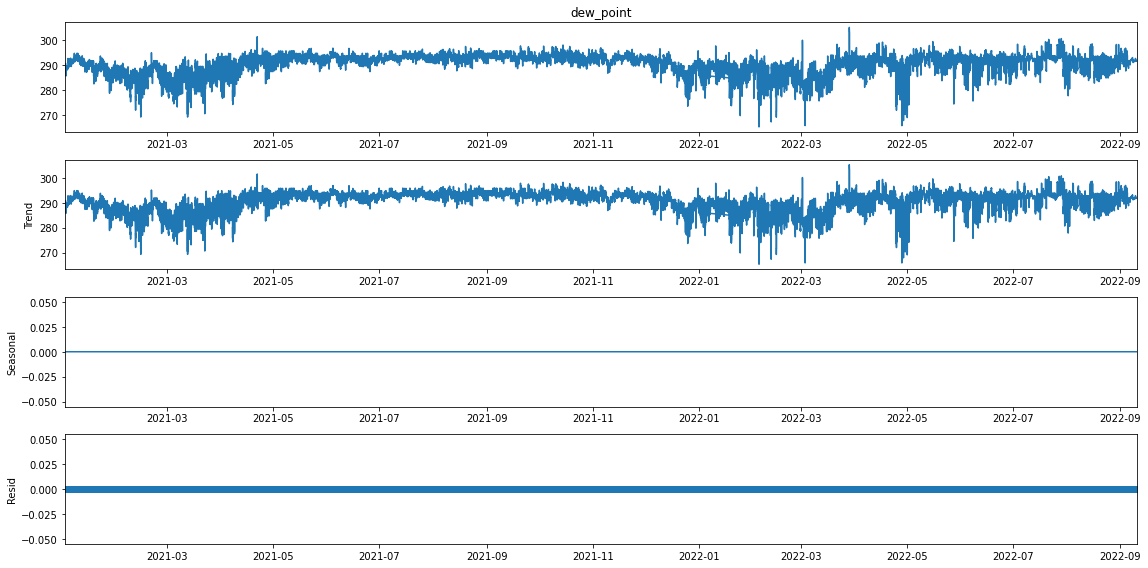

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
seasonal_decompose(df["dew_point"], period=1).plot();

In [ ]:
# Wind Speed values

In [ ]:
px.line(df.wind_speed, labels={"dt": "Date", "value": "Wind Speed Values"}, title="Wind Speed Values Over Time")

## **From below plot, we can clearly able to see there is no sesonality or trend component in the time-series**

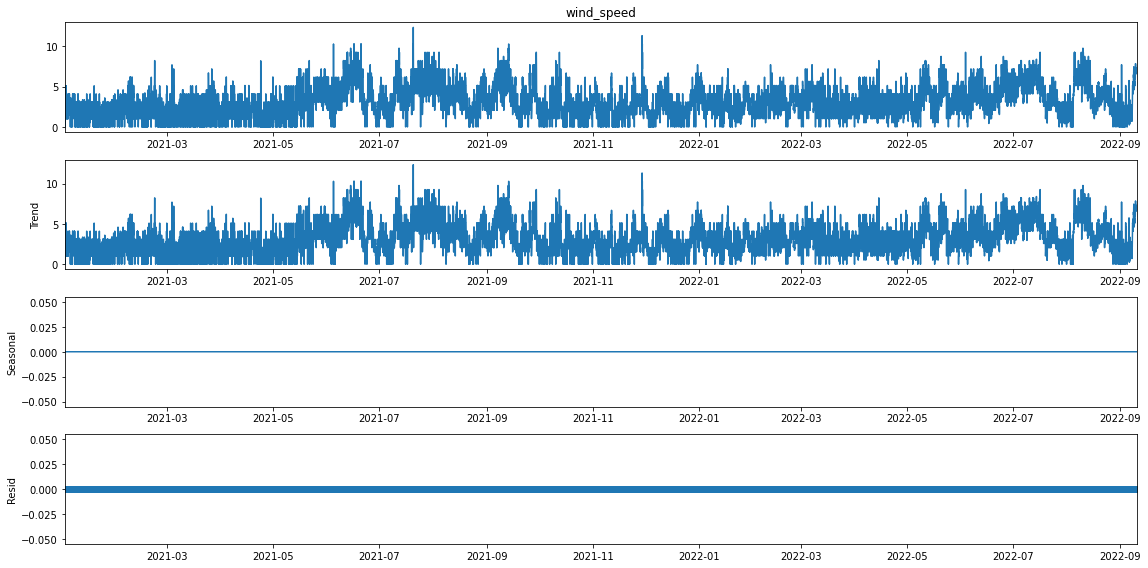

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
seasonal_decompose(df["wind_speed"], period=1).plot();

In [ ]:
# Wind Deg values

In [ ]:
fig = px.line(df.wind_deg, labels={"dt": "Date", "value": "Wind Deg Values"}, title="Wind Deg Values Over Time")

fig['data'][0]['line']['color']= "#e05368"
fig['data'][0]['line']['width']= 2

fig.show()

## **From below plot, we can clearly able to see there is no sesonality or trend component in the time-series**

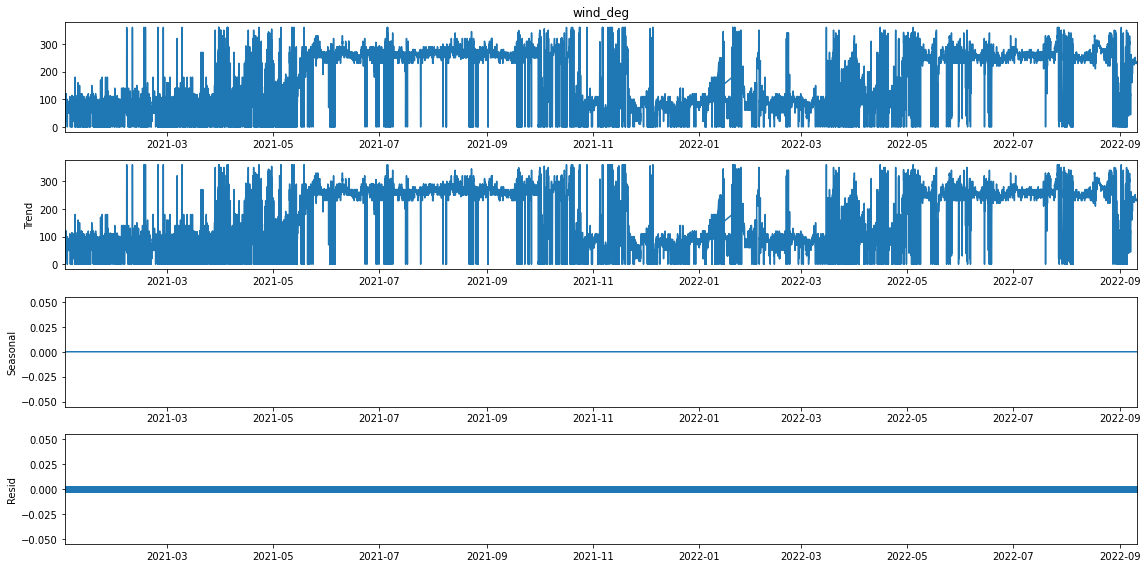

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
seasonal_decompose(df["wind_deg"], period=1).plot();

In [ ]:
# Pressure Values

In [ ]:
fig = px.line(df.pressure, labels={"dt": "Date", "value": "Pressure Values"}, title="Pressure Values Over Time")

fig.show()

## **From below plot, we can clearly able to see there is no sesonality or trend component in the time-series**

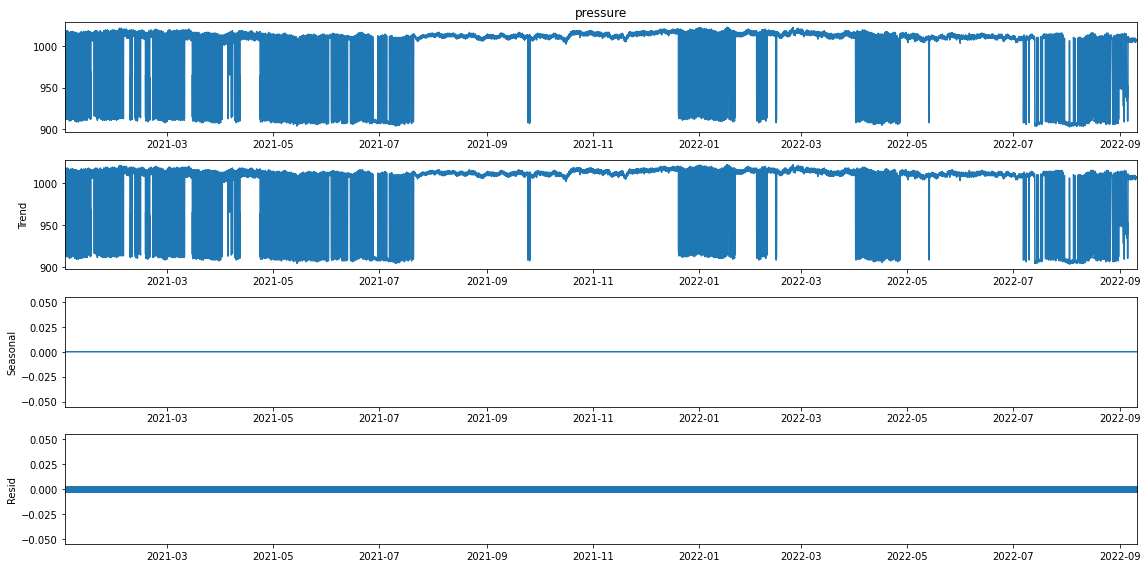

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
seasonal_decompose(df["pressure"], period=1).plot();

In [ ]:
# Humidity Values

In [ ]:
fig = px.line(df.humidity, labels={"dt": "Date", "value": "Humidity Values"}, title="humidity Values Over Time")

fig['data'][0]['line']['color']= "#e05368"
fig['data'][0]['line']['width']= 2

fig.show()

## **From below plot, we can clearly able to see there is no sesonality or trend component in the time-series**

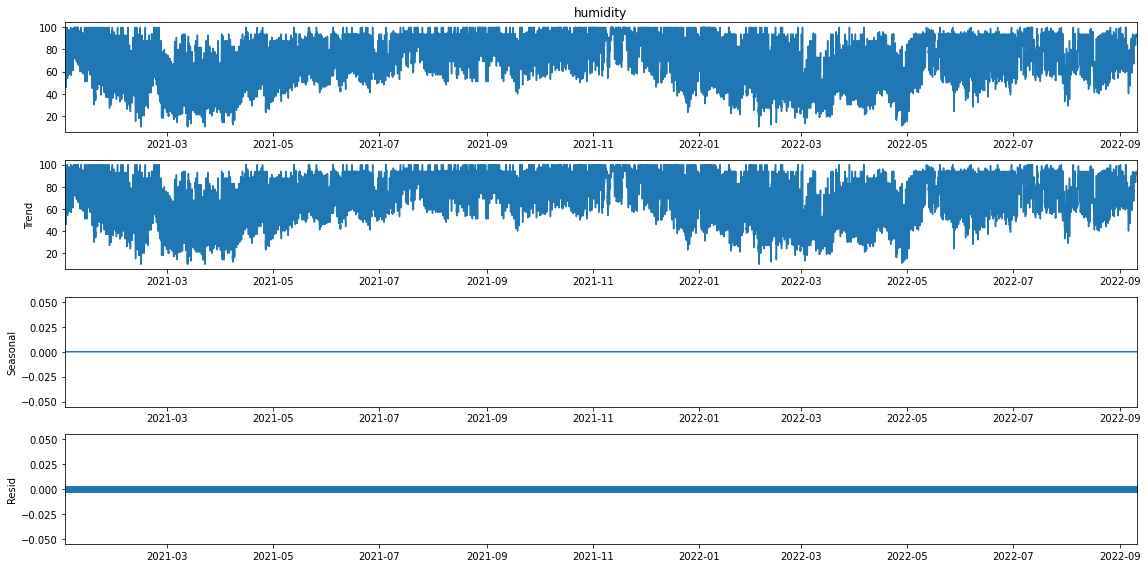

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
seasonal_decompose(df["humidity"], period=1).plot();

In [ ]:
# Temperature Values

In [ ]:
fig = px.line(df.temp, labels={"dt": "Date", "value": "Temperature Values"}, title="Temperature Values Over Time")

fig['data'][0]['line']['color']= "#34eb83"
fig['data'][0]['line']['width']= 2

fig.show()

## **From below plot, we can clearly able to see there is no sesonality or trend component in the time-series**

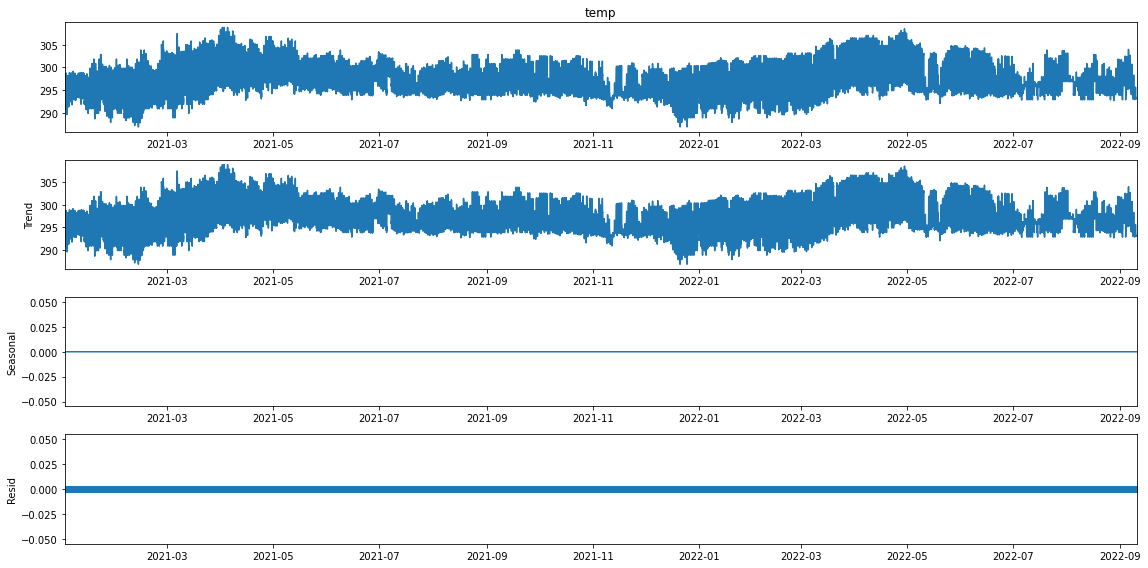

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
seasonal_decompose(df["temp"], period=1).plot();

## Stationarity
**Stationarity, is important in the Time Series, because most of the Statistical model, will assume that the data is not dependent on the time. If there is Seasonality, Trend, then our data is dependent on the time. And also it voilates the condition on stationarity, The Time-Series is stationary when the data is has no Seasonality and Trend. To find whether the data is stationary or not, we will have a different test to check, whether our time-series data has a Unit Root or not, if Time-Series has a unit root, then the time-series is set to be a Random-Walk, which is special kind of Non-Stationary Time-Series**
- Test Used for Checking Stationarity are, 
1. KPSS Test.
2. Agumented Dickey Fuller Test.
3. Philips Preston Test 

**In Dickey Fuller Test:**

*Null Hypothesis: Time-Series is not stationary*

*Alternate Hypothesis: Time-Seris is stationary*

In [ ]:
def stationarity_check_with_adfuller(series: list) ->str :
  
    adfuller_test = adfuller(series)
    print(adfuller_test)
    adf_value = adfuller_test[0]
    critical_value = adfuller_test[4]["5%"]

    print(f"ADF value/ Test Statistic {adf_value}")
    print(f"Critical value is {critical_value}")
    print("p-value: ", adfuller_test[1])

    if adfuller_test[1] < 0.05:
        print("Rejecting the Null Hypothesis, So the Time-Series does not contain the Unit Root, So it is Stationary Time Series")
    else:
        print("Failed to Rejcting the Null Hypothesis, So the Time-Series contains the Unit Root, So the Time-Series is Non-Stationary")

**In KPSS Test:**

*Null Hypothesis: Time-Series is stationary*

*Alternate Hypothesis: Time-Seris is not stationary*

In [ ]:
def stationarity_check_with_Kpss(series: list) ->str :
  
  stats, p, lags, critical_values = kpss(series)
  print("Test Statistics/ KPSS value: ", stats)
  print("P-value: ", p)
  print("Critical values: ", critical_values)

  if p < 0.05:
    print("Rejecting the Null Hypothesis, So the Time-Series contains the Unit Root, So it is Not Stationary Time Series")
  else: 
    print("Failed to Rejcting the Null Hypothesis, So the Time-Series contains the Unit Root, So the Time-Series is Non-Stationary")

In [ ]:
# Adfuller test for all the series 

for col in df.columns: 
  print("----------ADFuller Test-----------")
  print(f"adfuller test for col: {col}")
  stationarity_check_with_adfuller(df[col])
  print("----------------------------------")
  print()

----------ADFuller Test-----------
adfuller test for col: sunrise
(-0.49310272435901786, 0.893355440383377, 43, 15969, {'1%': -3.4307595655002263, '5%': -2.8617210110398723, '10%': -2.566866347667563}, 362293.5916445253)
ADF value/ Test Statistic -0.49310272435901786
Critical value is -2.8617210110398723
p-value:  0.893355440383377
Failed to Rejcting the Null Hypothesis, So the Time-Series contains the Unit Root, So the Time-Series is Non-Stationary
----------------------------------

----------ADFuller Test-----------
adfuller test for col: sunset
(-0.4955550596251005, 0.8928809820524597, 43, 15969, {'1%': -3.4307595655002263, '5%': -2.8617210110398723, '10%': -2.566866347667563}, 362298.49036815844)
ADF value/ Test Statistic -0.4955550596251005
Critical value is -2.8617210110398723
p-value:  0.8928809820524597
Failed to Rejcting the Null Hypothesis, So the Time-Series contains the Unit Root, So the Time-Series is Non-Stationary
----------------------------------

----------ADFuller T

In [ ]:
# KPSS Test for Time-series

for col in df.columns: 
  print("----------KPSS Test-----------")
  print(f"KPSS Test for col: {col}")
  stationarity_check_with_Kpss(df[col])
  print("----------------------------------")
  print()

----------KPSS Test-----------
KPSS Test for col: sunrise
Test Statistics/ KPSS value:  21.138911305273176
P-value:  0.01
Critical values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Rejecting the Null Hypothesis, So the Time-Series contains the Unit Root, So it is Not Stationary Time Series
----------------------------------

----------KPSS Test-----------
KPSS Test for col: sunset
Test Statistics/ KPSS value:  21.138647847603576
P-value:  0.01
Critical values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Rejecting the Null Hypothesis, So the Time-Series contains the Unit Root, So it is Not Stationary Time Series
----------------------------------

----------KPSS Test-----------
KPSS Test for col: temp
Test Statistics/ KPSS value:  1.4802578886291209
P-value:  0.01
Critical values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Rejecting the Null Hypothesis, So the Time-Series contains the Unit Root, So it is Not Stationary Time Series
--------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.7/dis

#### All the Series are stationary, so we can able to apply any statistically model on our time-series without need to transform our time-series to stationary.
#### In this time-series, We need to find whether the variables are **Endogenous variables** or **Exogenous variables**. For this we will do the **Granger Causality test and also Cointegration test**.
#### When we do granger causality test on two variables(v1 and v2). If v1 granger causes v2, and also v2 granger causes v1, then it is a **Endogenous Variable**.
#### When we do granger causality test on two variables(v1 and v2). If v1 granger causes v2, and but v2 does not granger causes v1, then it is a **Exogenous Variable**.

In [ ]:
# Granger Causality test

**Granger Causality Test**

*Null Hypothesis: X1 does not granger causes X2*.

*Alternate Hypothesis: X1 granger causes X2*.

In [ ]:
def granger_causality_test(x1: str, x2: str, df, lags=2): 
  result = grangercausalitytests(df[[x1, x2]], maxlag=lags, verbose=False)
  #print(result)
  print(f"{x1} vs {x2}")
  list_of_p_values = [result[i+1][0]["ssr_ftest"][1] for i in range(lags)]
  print("p-values for all rhe lags")
  print(list_of_p_values)
  print("-------------------------")
  print()

In [ ]:
# First-Level Granger Causality Test

for col1 in df.columns:
  for col2 in df.columns: 
    if col1 == col2:
      pass 
    else: 
      granger_causality_test(col1, col2, df,  lags=1)

sunrise vs sunset
p-values for all rhe lags
[0.5589731361673227]
-------------------------

sunrise vs temp
p-values for all rhe lags
[2.9934163647603136e-18]
-------------------------

sunrise vs feels_like
p-values for all rhe lags
[4.609303165070988e-17]
-------------------------

sunrise vs pressure
p-values for all rhe lags
[1.332437413630172e-07]
-------------------------

sunrise vs humidity
p-values for all rhe lags
[5.352115659002711e-17]
-------------------------

sunrise vs dew_point
p-values for all rhe lags
[1.983161914978288e-05]
-------------------------

sunrise vs clouds
p-values for all rhe lags
[0.004488380957169033]
-------------------------

sunrise vs wind_speed
p-values for all rhe lags
[0.26576511331591807]
-------------------------

sunrise vs wind_deg
p-values for all rhe lags
[0.03589916669475947]
-------------------------

sunset vs sunrise
p-values for all rhe lags
[0.559411195452775]
-------------------------

sunset vs temp
p-values for all rhe lags
[3.03

**Clearly, we can able to see that no variable has granger causes with another variable. So, there is no Exogneous and EndoGenous Variable in the dataset. So we use the Time-Series with VAR(Vector AutoRegression) or SARIMAX models**

In [ ]:
#scaler = MinMaxScaler()
#scaler = scaler.fit(df)
#scaled_df = scaler.transform(df)
#scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
#scaled_df.index = df.index

training_split = df[:14000]
#training_split = pd.DataFrame(training_split)
testing_split = df[14000:]
#testing_split = pd.DataFrame(testing_split)
len(testing_split)

2013

*Using LSTM for multivariate time-series with endogenous varibales, because the statistical methods shows no significant relationship between the variables, so cannot use the VAR or SARIMAX models*

*Creating a 3d dataset from the time-series dataset with shape of (16000, 24, 6)*

In [ ]:
# Creating an array from the series for training

temp_seq = array(training_split.temp)
pressure_seq = array(training_split.pressure)
wind_speed_seq = array(training_split.wind_speed)
wind_deg_seq = array(training_split.wind_deg)
humidity_seq = array(training_split.humidity)
dew_point_seq = array(training_split.dew_point)
dew_point_seq

# creating an array from series for testing

temp_seq_test = array(testing_split.temp)
pressure_seq_test = array(testing_split.pressure)
wind_speed_seq_test = array(testing_split.wind_speed)
wind_deg_seq_test = array(testing_split.wind_deg)
humidity_seq_test = array(testing_split.humidity)
dew_point_seq_test = array(testing_split.dew_point)
dew_point_seq

array([290.58, 289.11, 290.1 , ..., 293.09, 293.95, 294.38])

In [ ]:
# reshape series for training

temp_seq = temp_seq.reshape((len(temp_seq), ))
pressure_seq = pressure_seq.reshape((len(pressure_seq), ))
wind_speed_seq = wind_speed_seq.reshape((len(wind_speed_seq), ))
wind_deg_seq = wind_deg_seq.reshape((len(wind_deg_seq), ))
humidity_seq = humidity_seq.reshape((len(humidity_seq), ))
dew_point_seq = dew_point_seq.reshape((len(dew_point_seq), ))
print("shape of series", dew_point_seq.shape)
dew_point_seq

# Reshaoe series for testing

temp_seq_test = temp_seq_test.reshape((len(temp_seq_test), ))
pressure_seq_test = pressure_seq_test.reshape((len(pressure_seq_test), ))
wind_speed_seq_test = wind_speed_seq_test.reshape((len(wind_speed_seq_test), ))
wind_deg_seq_test = wind_deg_seq_test.reshape((len(wind_deg_seq_test), ))
humidity_seq_test = humidity_seq_test.reshape((len(humidity_seq_test), ))
dew_point_seq_test = dew_point_seq_test.reshape((len(dew_point_seq_test), ))
print("shape of series", dew_point_seq.shape)
dew_point_seq

shape of series (14000,)
shape of series (14000,)


array([290.58, 289.11, 290.1 , ..., 293.09, 293.95, 294.38])

In [ ]:
# horizontally stack columns, Using this we will create a new structed dataset from time-series dataset

#, humidity_seq, wind_speed_seq, wind_deg_seq, dew_point_seq

#dataset = hstack((temp_seq, pressure_seq))
#dataset

#, humidity_seq_test, wind_deg_seq_test, wind_deg_seq_test, dew_point_seq_test

#testing_dataset = hstack((temp_seq_test, pressure_seq_test))
#dataset

In [ ]:
# define generator

n_features = 1
n_input = 6
generator = TimeseriesGenerator(temp_seq, temp_seq, length=n_input, batch_size=16)
generator
validation_generator = TimeseriesGenerator(temp_seq_test, temp_seq_test, length=n_input, batch_size=10)

In [ ]:
# define model
temp_model = Sequential()
temp_model.add(LSTM(1024, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
#model.add(LSTM(512, activation='relu', return_sequences=True))
temp_model.add(LSTM(256, activation='relu', return_sequences=True))
temp_model.add(LSTM(128, activation='relu', return_sequences=True))
temp_model.add(LSTM(64, activation='relu', return_sequences=True))
temp_model.add(LSTM(32, activation='relu', return_sequences=False))
temp_model.add(Dense(1))
temp_model.compile(optimizer='adam', loss='mse')
temp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 1024)           4202496   
                                                                 
 lstm_1 (LSTM)               (None, 6, 256)            1311744   
                                                                 
 lstm_2 (LSTM)               (None, 6, 128)            197120    
                                                                 
 lstm_3 (LSTM)               (None, 6, 64)             49408     
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,773,217
Trainable params: 5,773,217
Non-

In [ ]:
# fit model

history = temp_model.fit(generator, steps_per_epoch=1, epochs=100, verbose=1, validation_data=validation_generator)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 88628.0781 - val_loss: 86240.5156
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 85796.4297 - val_loss: 75956.5156
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 75647.9688 - val_loss: 75222.9844
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 75962.7500 - val_loss: 61058.4531
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 61308.8789 - val_loss: 53536.7930
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 55032.1484 - val_loss: 56403.1211
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 57046.2656 - val_loss: 49198.0391
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 50546.6484 - val_loss: 54666.8945
Epoch 9/100
1/1 [==============================] - 1s 1s/step - loss: 55546.6719 - val_loss: 10354.7373
Epoch 10/100
1/1 [==============================] - 1s 1s/step -

In [ ]:
# Prediction on Testing Data

temp_yhat = temp_model.predict(validation_generator, verbose=0)
print(temp_yhat)
temp_yhat = temp_yhat.reshape(len(temp_yhat), )

[[293.8258 ]
 [294.01074]
 [294.19086]
 ...
 [291.51712]
 [291.36658]
 [291.30518]]


In [ ]:
temp_y_test = np.array(df["temp"][14006:])

In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error, r2_score

r2_score(temp_yhat, temp_y_test)
mean_absolute_error(temp_yhat, temp_y_test)

2.6251606523165063

In [ ]:
# prediction on Training data

temp_training_yhat = temp_model.predict(generator, verbose=0)
temp_training_yhat = temp_training_yhat.reshape(len(temp_training_yhat), )

In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error, r2_score


mean_absolute_error(temp_training_yhat, temp_seq[6:14000])

3.6016381198282805

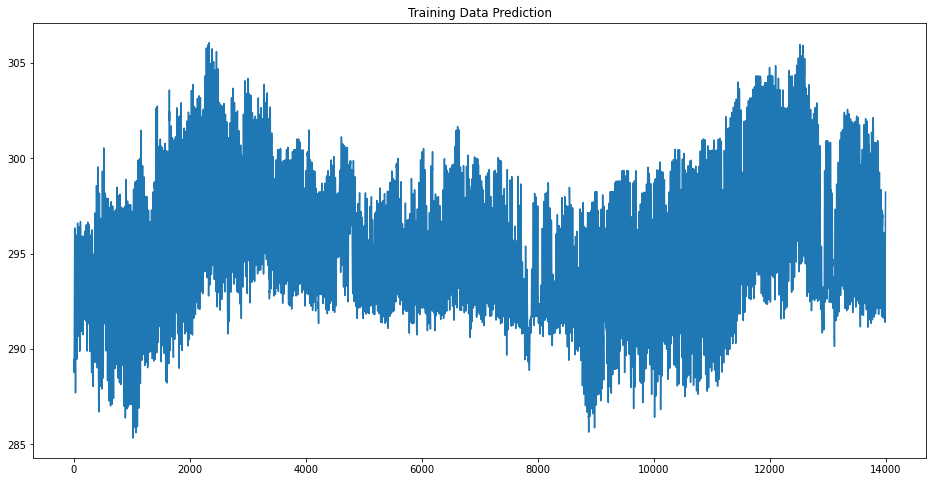

In [ ]:
figure = plt.figure(figsize=(16, 8))
pd.Series(temp_training_yhat).plot(title="Training Data Prediction")

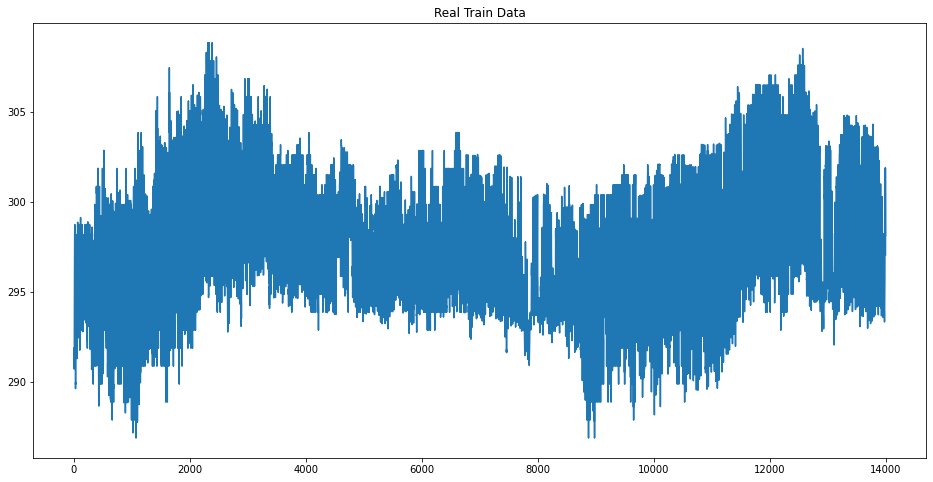

In [ ]:
pd.Series(temp_seq).plot(title="Real Train Data")

In [ ]:
temp_y_test[1000:]

array([300.77, 296.91, 298.78, ..., 293.03, 293.1 , 293.1 ])

In [ ]:
temp_yhat[1000:]

array([[300.50354],
       [300.3667 ],
       [299.52554],
       ...,
       [291.51712],
       [291.36658],
       [291.30518]], dtype=float32)

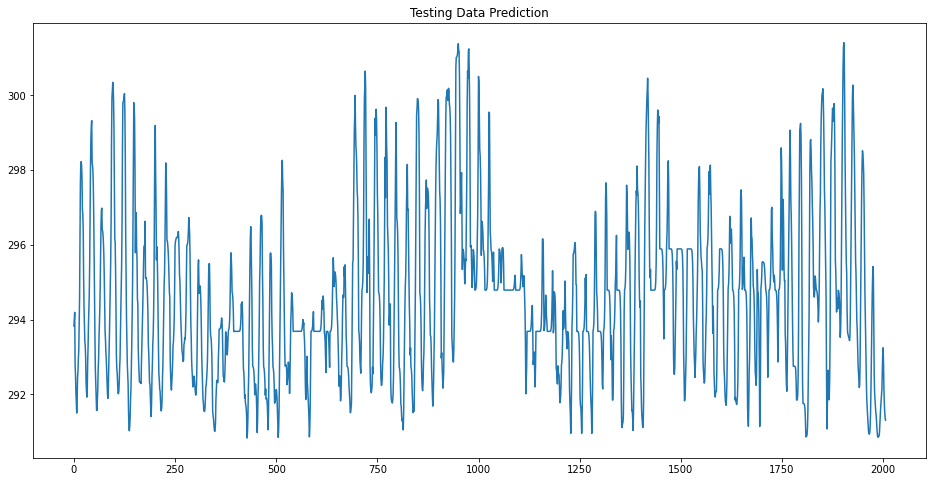

In [ ]:
pd.Series(temp_yhat).plot(title="Testing Data Prediction")

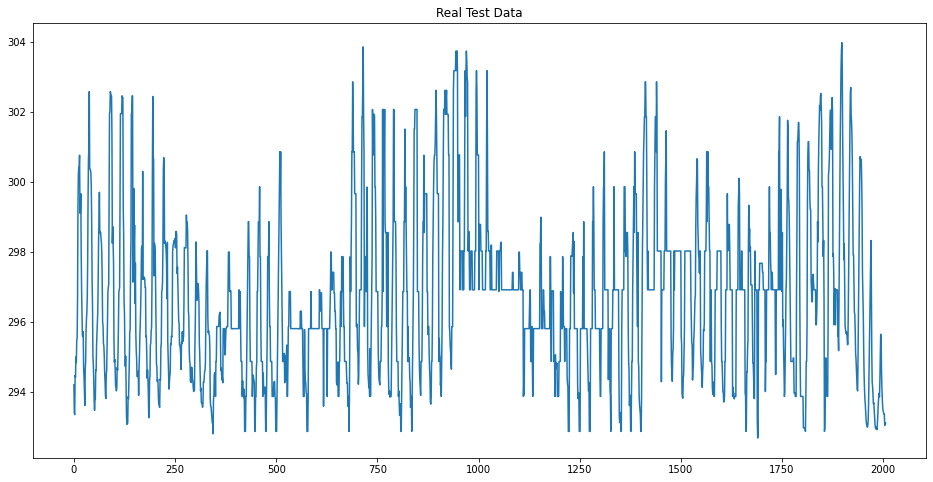

In [ ]:
pd.Series(temp_y_test).plot(title="Real Test Data")

In [ ]:
temp_model.save("temperature_lstm.h5")

### Creating function for prediction and model creation

In [ ]:
# define generator
def create_generator(n_input, time_series, test_time_series, train_generator_batch_size, test_generator_batch_size): 

 # n_input = n_input
  generator_func = TimeseriesGenerator(time_series, time_series, length=n_input, batch_size=train_generator_batch_size)
  validation_generator_func = TimeseriesGenerator(test_time_series, test_time_series, length=n_input, batch_size=test_generator_batch_size)
  return generator_func, validation_generator_func


class Model: 
  def __init__(self): 
    self.model = None
    self.history = None

  def create_model(self, layers: list): 
    try: 
      model = Sequential()
      for layer in layers:
        model.add(layer)
      
      model.compile(optimizer='adam', loss='mse')
      self.model = model
      return self.model
    
    except Exception as error:
      return error

  def summary(self):
    try: 
      self.model.summary()
    
    except Exception as error: 
      return error

  def fit(self, generator, epochs, no_of_iterations, validation_generator=None): 
    try: 
      self.history = self.model.fit(generator, steps_per_epoch=no_of_iterations, epochs=epochs, verbose=1, validation_data=validation_generator)                             )
      return self.history

    except Exception as error:
      return error

  def plot(self): 
    try: 
      plt.plot(self.history.history['loss'], label='Training loss')
      plt.plot(self.history.history['val_loss'], label='Validation loss')
      plt.legend()
    
    except Exception as error: 
      return error

  def predict(self, validation_generator): 
    try: 
      yhat = self.model.predict(validation_generator, verbose=0)
      print(yhat)
      
    except Exception as error: 
      print("[+] Error has occured: ", error)
    
    finally: 
      return yhat

  def save_model(self, filename): 
    try:
      self.model.save(filename)
    
    except Exception as error:
      return error


In [ ]:
model_obj = Model()
print(model_obj)
layers = [
      LSTM(1024, activation='relu', input_shape=(2, 1), return_sequences=True),
     # LSTM(1024, activation='relu', return_sequences=True),
     # LSTM(512, activation='relu', return_sequences=True),
     # LSTM(256, activation='relu', return_sequences=True),
     # LSTM(128, activation='relu', return_sequences=True),
      LSTM(64, activation='relu', return_sequences=True),
      LSTM(32, activation='relu', return_sequences=False),
      #Dropout(0.5),
      Dense(1)
]
model = model_obj.create_model(layers=layers)
model_obj.summary()

In [ ]:
# Early Stopping
early_stopping = tf.callbacks.EarlyStopping(monitor='loss', patience=5)

In [ ]:
# Pressure 
pressure_generator, pressure_validation_generator = create_generator(2, pressure_seq, pressure_seq_test, 16, 10)
model_obj.fit(pressure_generator, 10, 100, validation_generator=pressure_validation_generator)

100/100 [==============================] - 6s 29ms/step - loss: 181941.7188 - val_loss: 1091.0258
Epoch 2/10
100/100 [==============================] - 3s 25ms/step - loss: 700.0947 - val_loss: 1059.9165
Epoch 3/10
100/100 [==============================] - 3s 25ms/step - loss: 625.5240 - val_loss: 1102.1013
Epoch 4/10
100/100 [==============================] - 3s 32ms/step - loss: 764.6780 - val_loss: 1161.0161
Epoch 5/10
100/100 [==============================] - 6s 57ms/step - loss: 792.3273 - val_loss: 1057.2454
Epoch 6/10
100/100 [==============================] - 4s 39ms/step - loss: 810.8977 - val_loss: 1045.7881
Epoch 7/10
100/100 [==============================] - 3s 26ms/step - loss: 608.4966 - val_loss: 1033.6713
Epoch 8/10
100/100 [==============================] - 3s 26ms/step - loss: 795.1526 - val_loss: 1057.1422
Epoch 9/10
100/100 [==============================] - 3s 25ms/step - loss: 694.1002 - val_loss: 1059.4537
Epoch 10/10
100/100 [==============================] -

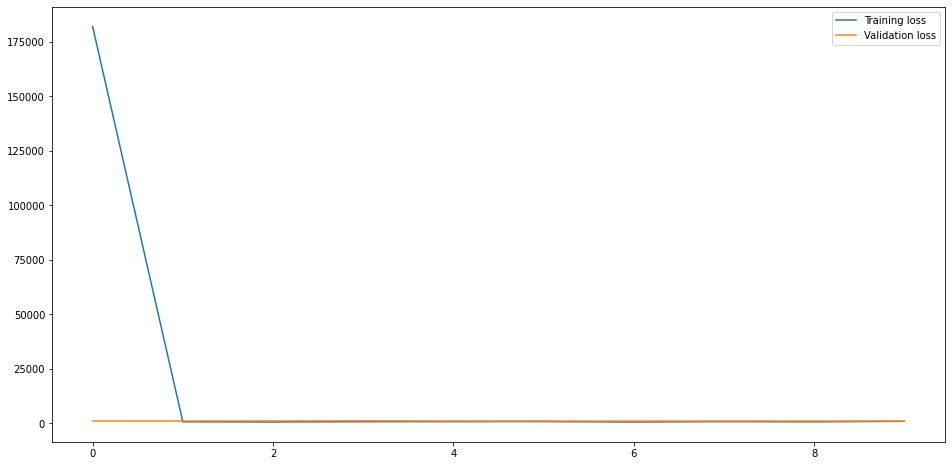

In [ ]:
model_obj.plot()

In [ ]:
# Prediction on Training Data

pressure_y_test = TimeseriesGenerator(pressure_seq,pressure_seq, length=2)
pressure_yhat = model_obj.predict(pressure_y_test)

[[1013.7803 ]
 [1012.30994]
 [1013.1317 ]
 ...
 [1009.1514 ]
 [1009.1514 ]
 [1009.3248 ]]


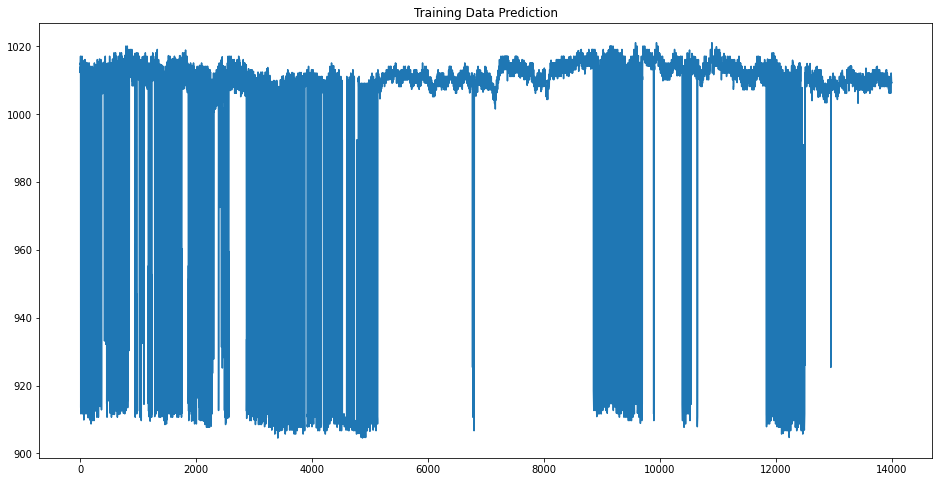

In [ ]:
pressure_yhat = pressure_yhat.reshape(len(pressure_yhat), )
pd.Series(pressure_yhat).plot(title="Training Data Prediction")

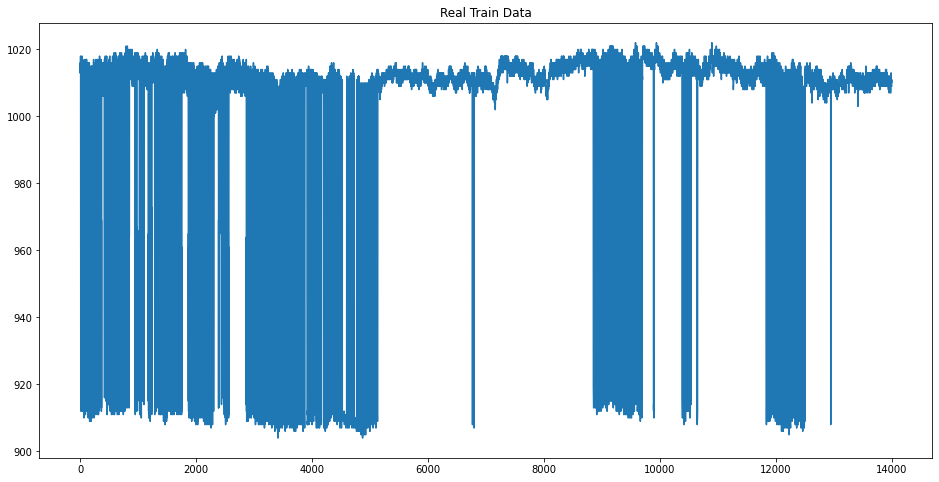

In [ ]:
pd.Series(pressure_seq).plot(title="Real Train Data")

In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error, r2_score

mean_absolute_error(np.round(pressure_yhat), pressure_seq[2:14000])

10.557865409344192

In [ ]:
pressure_yhat[1000:]

array([1015.9437, 1014.9486, 1013.9535, ..., 1009.1514, 1009.1514,
       1009.3248], dtype=float32)

In [ ]:
pressure_seq[1000:]

array([1017, 1016, 1015, ..., 1010, 1011, 1009])

In [ ]:
# [2048, 64, 32], 2

In [ ]:
np.round(pressure_yhat)[1000:]

array([1016., 1015., 1014., ..., 1009., 1009., 1009.], dtype=float32)

In [ ]:
# Prediction on Testing Data

pressure_training_yhat = model_obj.predict(pressure_generator)
pressure_training_yhat = pressure_training_yhat.reshape(len(pressure_training_yhat), )

[[1013.7802]
 [1012.31  ]
 [1013.1317]
 ...
 [1009.1515]
 [1009.1515]
 [1009.3247]]


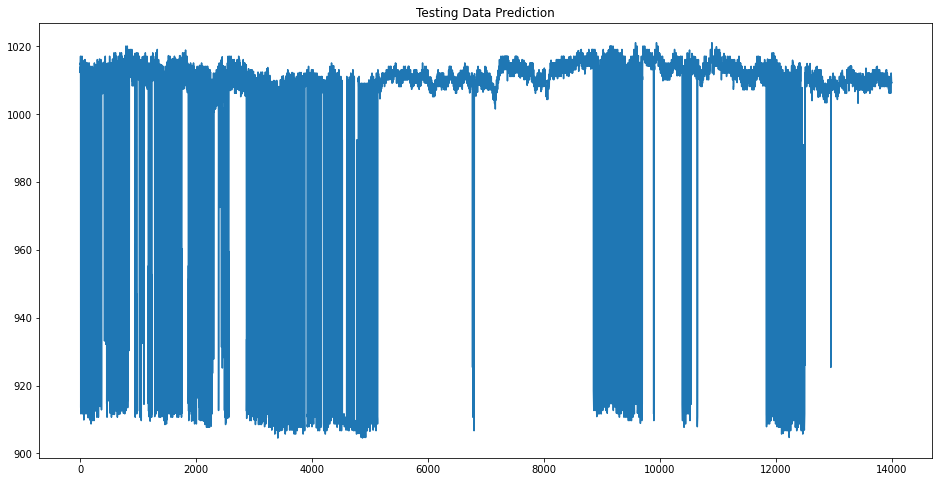

In [ ]:
pd.Series(pressure_training_yhat).plot(title="Testing Data Prediction")

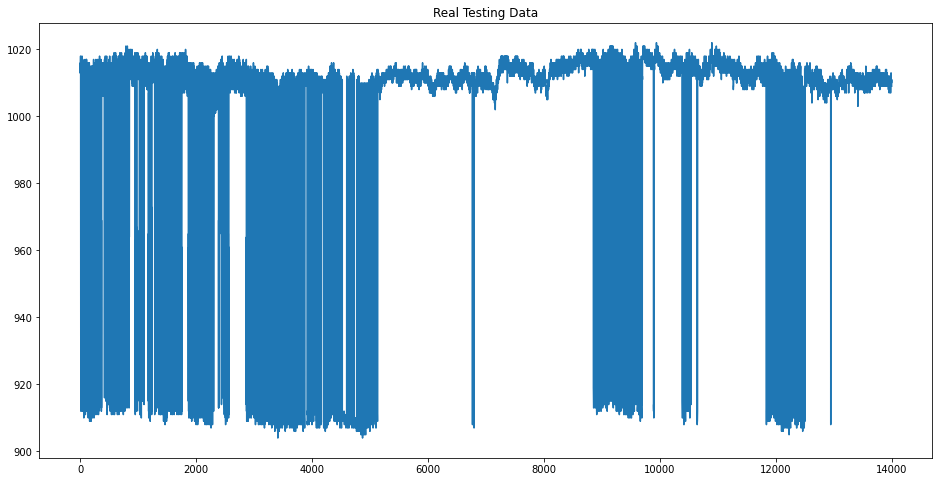

In [ ]:
pd.Series(pressure_seq).plot(title="Real Testing Data")

In [ ]:
model_obj.save_model("pressure_lstm_model.h5")


## **Wind Deg**


In [ ]:
# Wind Deg

wind_deg_model_obj = Model()
print(wind_deg_model_obj)
layers = [
      LSTM(1024, activation='relu', input_shape=(2, 1), return_sequences=True),
    #  LSTM(1024, activation='relu', return_sequences=True),
     # LSTM(512, activation='relu', return_sequences=True),
      #LSTM(256, activation='relu', return_sequences=True),
     # LSTM(128, activation='relu', return_sequences=True),
      LSTM(64, activation='relu', return_sequences=True),
      LSTM(32, activation='relu', return_sequences=False),
      #Dropout(0.5),
      Dense(1)
]
wind_deg_model = wind_deg_model_obj.create_model(layers=layers)
wind_deg_model_obj.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_69 (LSTM)              (None, 2, 1024)           4202496   
                                                                 
 lstm_70 (LSTM)              (None, 2, 64)             278784    
                                                                 
 lstm_71 (LSTM)              (None, 32)                12416     
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,493,729
Trainable params: 4,493,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Wind Deg
wind_deg_generator, wind_deg_validation_generator = create_generator(2, wind_deg_seq, wind_deg_seq_test, 16, 10)
wind_deg_model_obj.fit(wind_deg_generator, 10, 100, validation_generator=wind_deg_validation_generator)

Epoch 1/10
100/100 [==============================] - 7s 38ms/step - loss: 8595.1035 - val_loss: 3544.3071
Epoch 2/10
100/100 [==============================] - 4s 37ms/step - loss: 5718.3975 - val_loss: 3040.7019
Epoch 3/10
100/100 [==============================] - 3s 25ms/step - loss: 4448.9082 - val_loss: 5395.2847
Epoch 4/10
100/100 [==============================] - 3s 25ms/step - loss: 4141.4321 - val_loss: 4377.5415
Epoch 5/10
100/100 [==============================] - 3s 26ms/step - loss: 3875.7520 - val_loss: 3050.1992
Epoch 6/10
100/100 [==============================] - 3s 25ms/step - loss: 3509.9434 - val_loss: 2752.4233
Epoch 7/10
100/100 [==============================] - 3s 25ms/step - loss: 4489.3213 - val_loss: 3761.4299
Epoch 8/10
100/100 [==============================] - 3s 25ms/step - loss: 3899.7588 - val_loss: 3101.7102
Epoch 9/10
100/100 [==============================] - 2s 25ms/step - loss: 4562.7896 - val_loss: 2614.3267
Epoch 10/10
100/100 [================

In [ ]:
# Prediction on Training Data 

wind_deg_y_test = TimeseriesGenerator(wind_deg_seq, wind_deg_seq, length=2)
wind_deg_yhat = wind_deg_model_obj.predict(wind_deg_y_test)
wind_deg_yhat = wind_deg_yhat.reshape(len(wind_deg_yhat), )

[[ 51.615604]
 [ 99.41612 ]
 [ 84.31766 ]
 ...
 [229.31572 ]
 [224.34872 ]
 [234.01582 ]]


In [ ]:
wind_deg_seq

array([ 84,   0,  83, ..., 230, 240, 229])

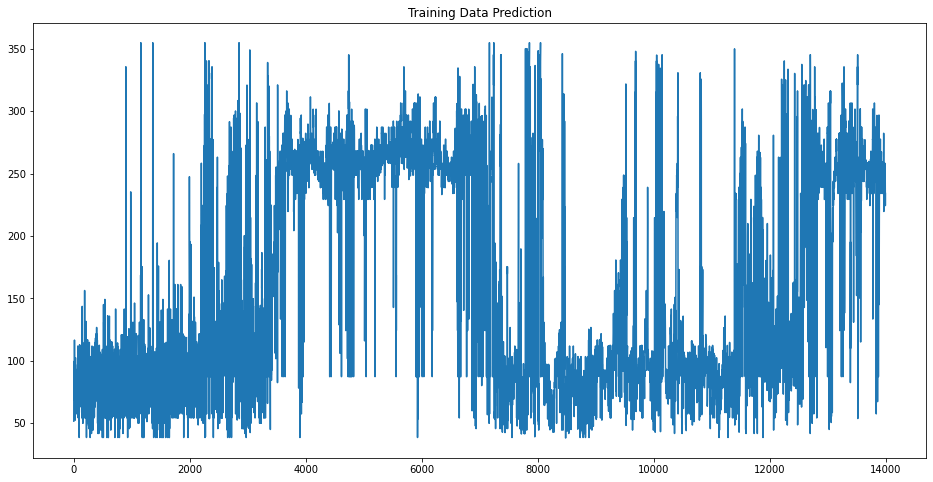

In [ ]:
pd.Series(wind_deg_yhat).plot(title="Training Data Prediction")

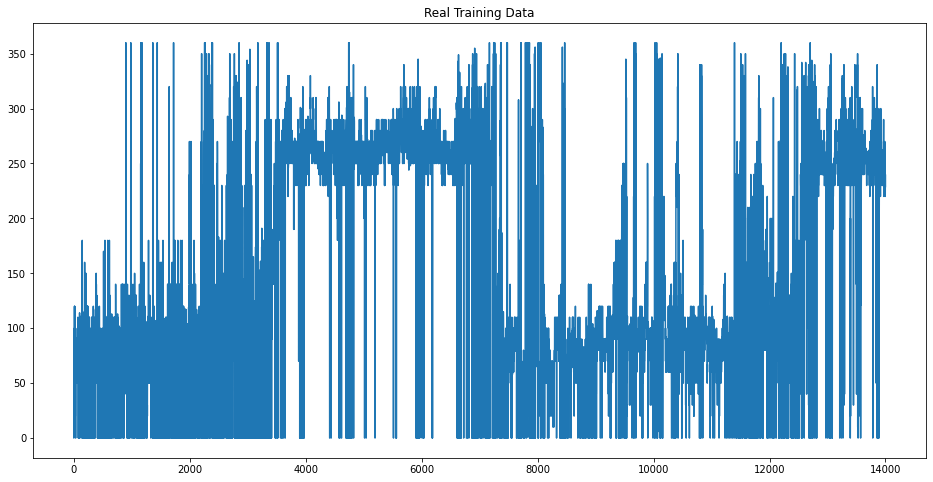

In [ ]:
pd.Series(wind_deg_seq).plot(title="Real Training Data")

In [ ]:
# Prediction on Testing Data 
wind_deg_testing_y_test = TimeseriesGenerator(wind_deg_seq, wind_deg_seq, length=2)
wind_deg_testing_yhat = wind_deg_model_obj.predict(wind_deg_validation_generator)
wind_deg_testing_yhat = wind_deg_testing_yhat.reshape(len(wind_deg_testing_yhat), )

[[234.14891]
 [229.29385]
 [234.01584]
 ...
 [231.22855]
 [229.78694]
 [230.72154]]


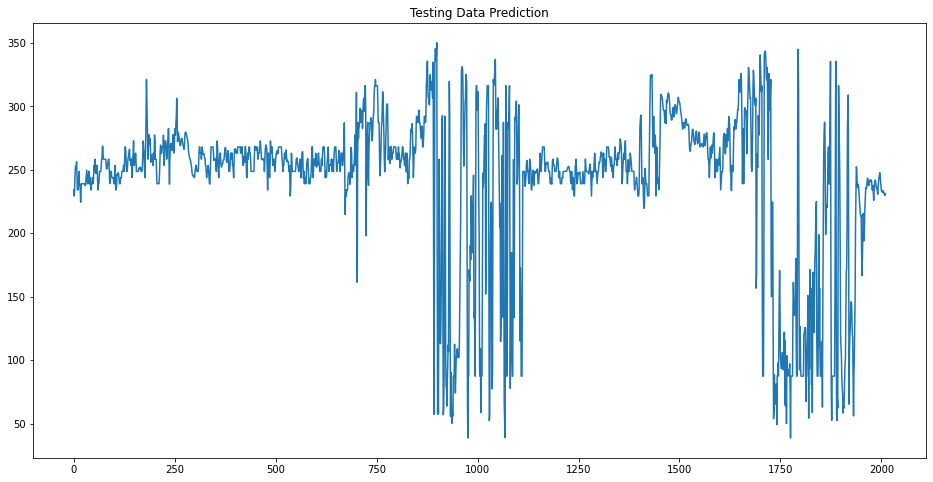

In [ ]:
pd.Series(wind_deg_testing_yhat).plot(title="Testing Data Prediction")

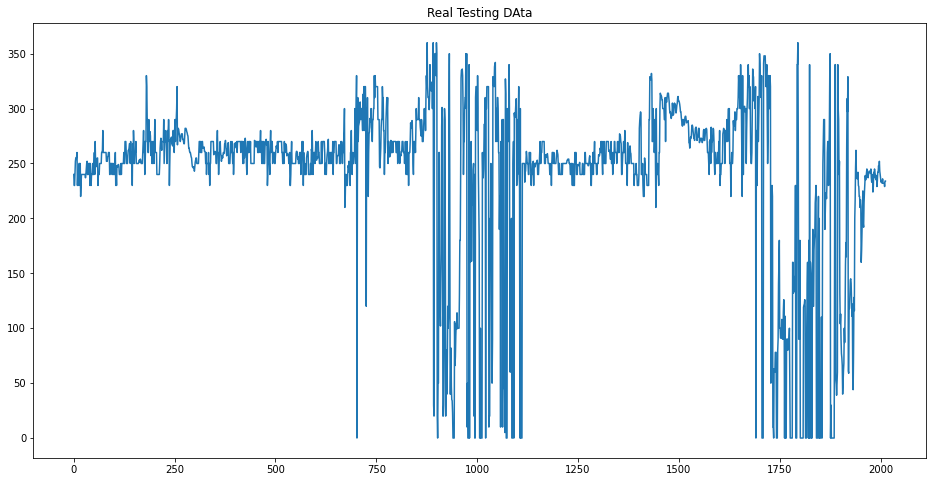

In [ ]:
pd.Series(wind_deg_seq_test).plot(title="Real Testing DAta")

In [ ]:
print("Mean Absolute Error", mean_absolute_error(wind_deg_seq_test[2: ], wind_deg_testing_yhat))
print("Mean Squared Error", mean_squared_error(wind_deg_seq_test[2: ], wind_deg_testing_yhat))

Mean Absolute Error 23.597059104763886
Mean Squared Error 2620.486069056666


In [ ]:
wind_deg_model_obj.save_model("wind_deg_model_lstm.h5")

## **Dew Point**

In [ ]:
dew_point_model_obj = Model()
print(dew_point_model_obj)
layers = [
      LSTM(1024, activation='relu', input_shape=(2, 1), return_sequences=True),
    #  LSTM(1024, activation='relu', return_sequences=True),
    #  LSTM(512, activation='relu', return_sequences=True),
     # LSTM(256, activation='relu', return_sequences=True),
      #LSTM(128, activation='relu', return_sequences=True),
      LSTM(64, activation='relu', return_sequences=True),
      LSTM(32, activation='relu', return_sequences=False),
      #Dropout(0.5),
      Dense(1)
]
dew_point_model = dew_point_model_obj.create_model(layers=layers)
dew_point_model_obj.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 2, 1024)           4202496   
                                                                 
 lstm_67 (LSTM)              (None, 2, 64)             278784    
                                                                 
 lstm_68 (LSTM)              (None, 32)                12416     
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,493,729
Trainable params: 4,493,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dew_point_generator, dew_point_validation_generator = create_generator(2, dew_point_seq, dew_point_seq_test, 16, 10)
dew_point_model_obj.fit(dew_point_generator, 10, 100, validation_generator=dew_point_validation_generator)

Epoch 1/10
100/100 [==============================] - 6s 29ms/step - loss: 9744.6367 - val_loss: 7.8828
Epoch 2/10
100/100 [==============================] - 3s 26ms/step - loss: 6.4811 - val_loss: 6.4696
Epoch 3/10
100/100 [==============================] - 3s 25ms/step - loss: 5.3005 - val_loss: 6.1650
Epoch 4/10
100/100 [==============================] - 3s 26ms/step - loss: 5.0013 - val_loss: 7.0728
Epoch 5/10
100/100 [==============================] - 3s 25ms/step - loss: 5.0148 - val_loss: 6.5505
Epoch 6/10
100/100 [==============================] - 3s 25ms/step - loss: 4.6209 - val_loss: 6.1465
Epoch 7/10
100/100 [==============================] - 3s 25ms/step - loss: 6.4831 - val_loss: 6.1479
Epoch 8/10
100/100 [==============================] - 3s 25ms/step - loss: 5.0701 - val_loss: 6.8178
Epoch 9/10
100/100 [==============================] - 3s 25ms/step - loss: 4.9217 - val_loss: 6.1216
Epoch 10/10
100/100 [==============================] - 3s 25ms/step - loss: 6.8266 - val

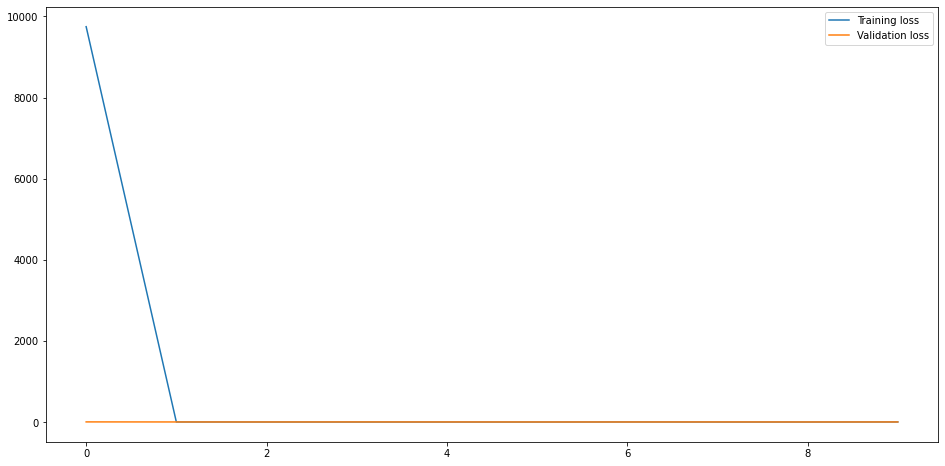

In [ ]:
dew_point_model_obj.plot()

In [ ]:
dew_point_y_test = TimeseriesGenerator(dew_point_seq, dew_point_seq, length=2)
dew_point_yhat = dew_point_model_obj.predict(dew_point_y_test)
dew_point_yhat = dew_point_yhat.reshape(len(dew_point_yhat), )

[[291.02585]
 [290.1045 ]
 [290.81335]
 ...
 [290.58792]
 [290.65344]
 [294.01743]]


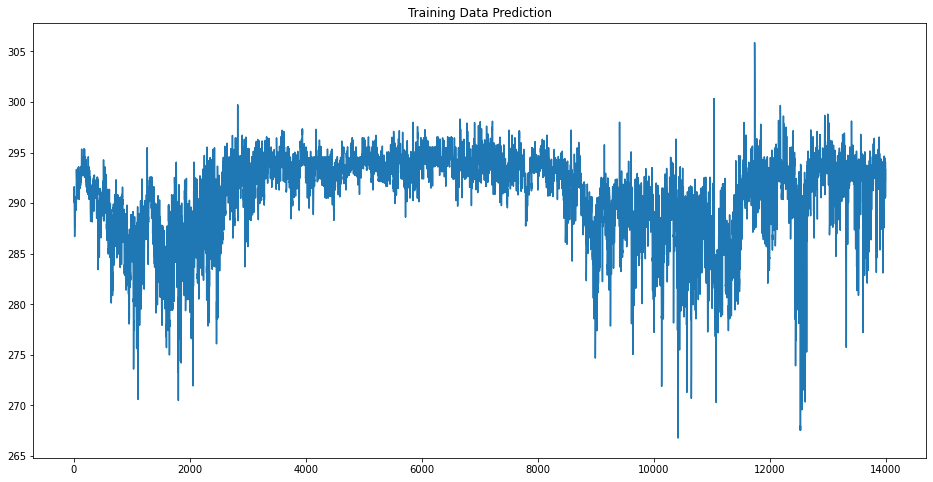

In [ ]:
pd.Series(dew_point_yhat).plot(title="Training Data Prediction")

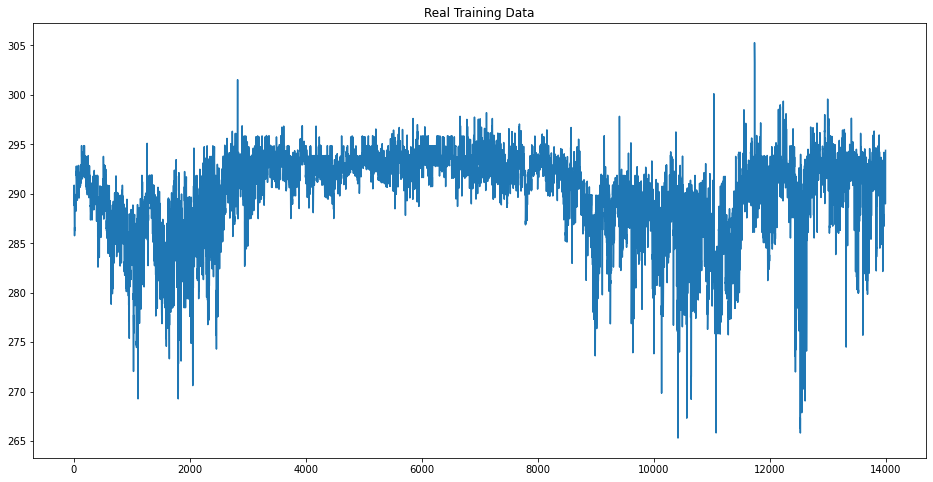

In [ ]:
pd.Series(dew_point_seq[2:14000]).plot(title="Real Training Data")

In [ ]:
dew_point_seq

array([290.58, 289.11, 290.1 , ..., 293.09, 293.95, 294.38])

In [ ]:
dew_point_yhat

array([294.84824, 293.79666, 294.57593, ..., 294.38412, 294.20996,
       297.78223], dtype=float32)

In [ ]:
# Prediction on Tesing data 

dew_point_testing_yhat = dew_point_model.predict(dew_point_validation_generator)
dew_point_testing_yhat = dew_point_testing_yhat.reshape(len(dew_point_testing_yhat), )

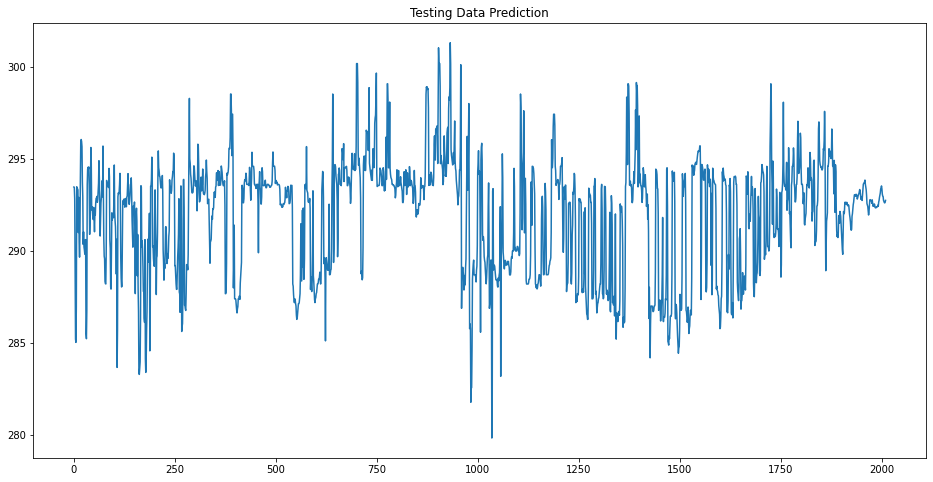

In [ ]:
pd.Series(dew_point_testing_yhat).plot(title="Testing Data Prediction")

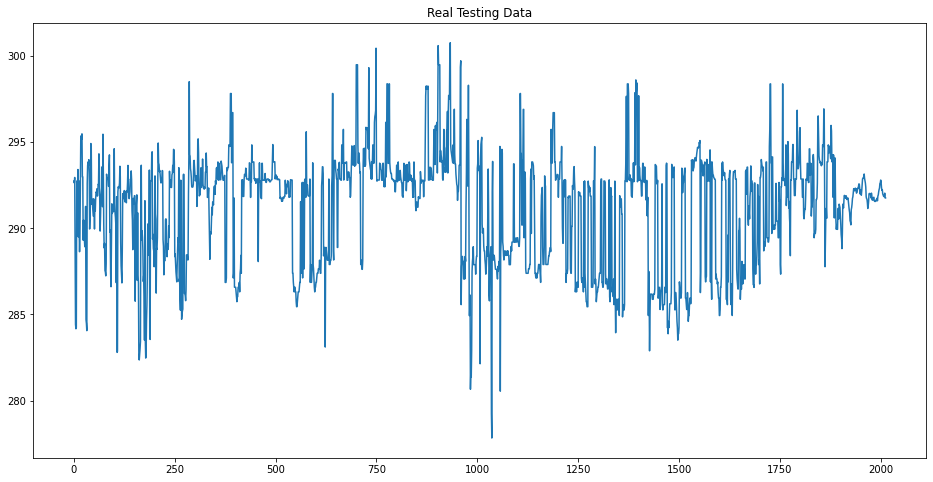

In [ ]:
pd.Series(dew_point_seq_test).plot(title="Real Testing Data")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Squared Error", mean_squared_error(dew_point_seq_test[2:], dew_point_testing_yhat))
print("Mean Absolute Error", mean_absolute_error(dew_point_seq_test[2:], dew_point_testing_yhat))

Mean Squared Error 6.684855314459582
Mean Absolute Error 1.7399203884251855


In [ ]:
dew_point_model_obj.save_model("dew_point_model_lstm.h5")

##**Humidity**

In [ ]:
humidity_model_obj = Model()
print(humidity_model_obj)
layers = [
      LSTM(1024, activation='relu', input_shape=(2, 1), return_sequences=True),
    #  LSTM(1024, activation='relu', return_sequences=True),
     # LSTM(512, activation='relu', return_sequences=True),
      LSTM(256, activation='relu', return_sequences=True),
      LSTM(128, activation='relu', return_sequences=True),
      LSTM(64, activation='relu', return_sequences=True),
      LSTM(32, activation='relu', return_sequences=False),
      #Dropout(0.5),
      Dense(1)
]
humidity_model = humidity_model_obj.create_model(layers=layers)
humidity_model_obj.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 2, 1024)           4202496   
                                                                 
 lstm_85 (LSTM)              (None, 2, 256)            1311744   
                                                                 
 lstm_86 (LSTM)              (None, 2, 128)            197120    
                                                                 
 lstm_87 (LSTM)              (None, 2, 64)             49408     
                                                                 
 lstm_88 (LSTM)              (None, 32)                12416     
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,773,217
Trainable params: 5,773,217
N

In [ ]:
humidity_generator, humidity_validation_generator = create_generator(2, humidity_seq, humidity_seq_test, 16, 10)
humidity_model_obj.fit(humidity_generator, 10, 100, validation_generator=humidity_validation_generator)

Epoch 1/10
100/100 [==============================] - 11s 45ms/step - loss: 840.9607 - val_loss: 123.5146
Epoch 2/10
100/100 [==============================] - 4s 38ms/step - loss: 133.4316 - val_loss: 126.9796
Epoch 3/10
100/100 [==============================] - 5s 53ms/step - loss: 118.7005 - val_loss: 104.8006
Epoch 4/10
100/100 [==============================] - 4s 39ms/step - loss: 106.8078 - val_loss: 94.2038
Epoch 5/10
100/100 [==============================] - 4s 38ms/step - loss: 99.5269 - val_loss: 87.2210
Epoch 6/10
100/100 [==============================] - 4s 38ms/step - loss: 76.3527 - val_loss: 89.8974
Epoch 7/10
100/100 [==============================] - 6s 64ms/step - loss: 81.2591 - val_loss: 93.6356
Epoch 8/10
100/100 [==============================] - 4s 38ms/step - loss: 93.6933 - val_loss: 96.1013
Epoch 9/10
100/100 [==============================] - 4s 37ms/step - loss: 88.6442 - val_loss: 108.3151
Epoch 10/10
100/100 [==============================] - 4s 37ms/s

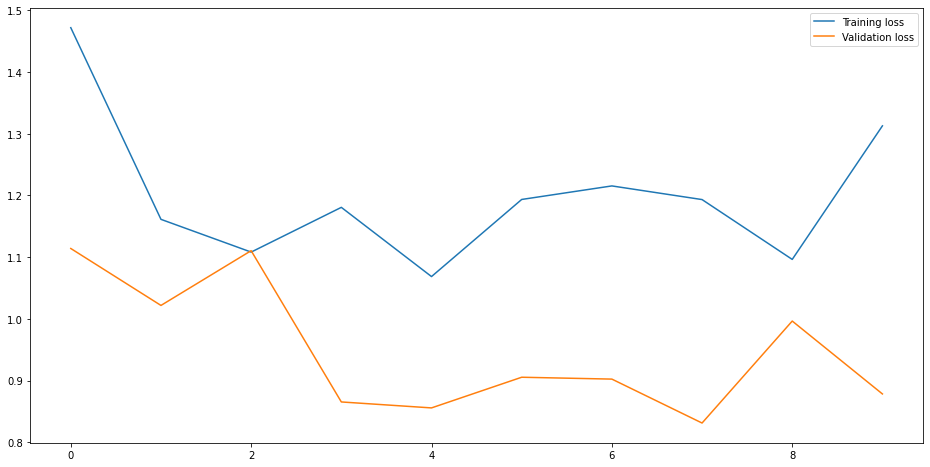

In [ ]:
humidity_model_obj.plot()

In [ ]:
humidity_y_test = TimeseriesGenerator(humidity_seq, humidity_seq, length=2)
humidity_yhat = humidity_model_obj.predict(humidity_y_test)
humidity_yhat = humidity_yhat.reshape(len(humidity_yhat), )

[[75.80216 ]
 [89.95318 ]
 [84.433876]
 ...
 [56.998825]
 [58.81668 ]
 [78.65922 ]]


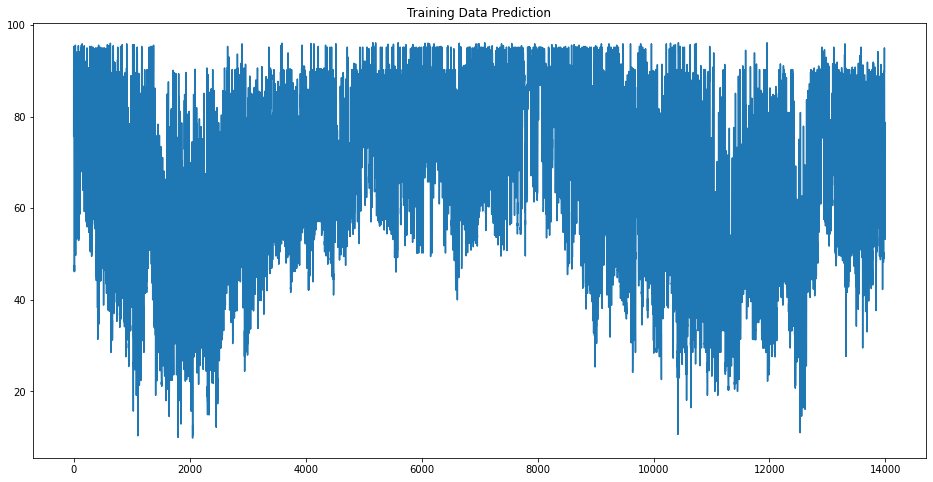

In [ ]:
pd.Series(humidity_yhat).plot(title="Training Data Prediction")

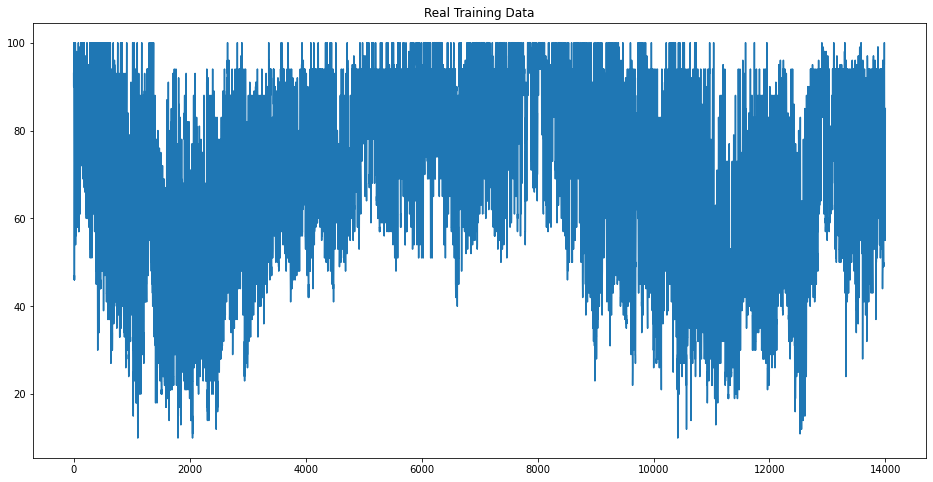

In [ ]:
pd.Series(humidity_seq[2:14000]).plot(title="Real Training Data")

In [ ]:
# Predicton on Testing Data 

humidity_testing_yhat = humidity_model_obj.predict(humidity_validation_generator)
humidity_testing_yhat = humidity_testing_yhat.reshape(len(humidity_testing_yhat), )

[[79.39621 ]
 [69.49506 ]
 [63.811893]
 ...
 [86.255   ]
 [89.61061 ]
 [86.48857 ]]


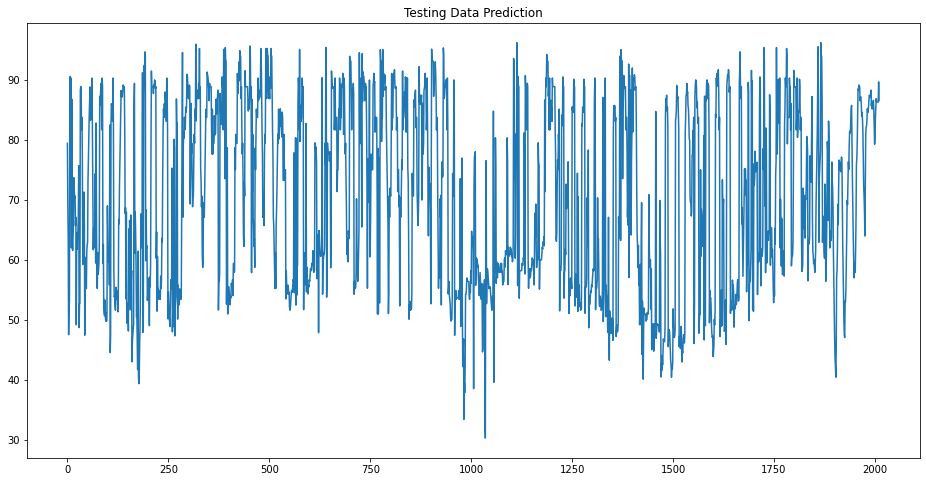

In [ ]:
pd.Series(humidity_testing_yhat).plot(title="Testing Data Prediction")

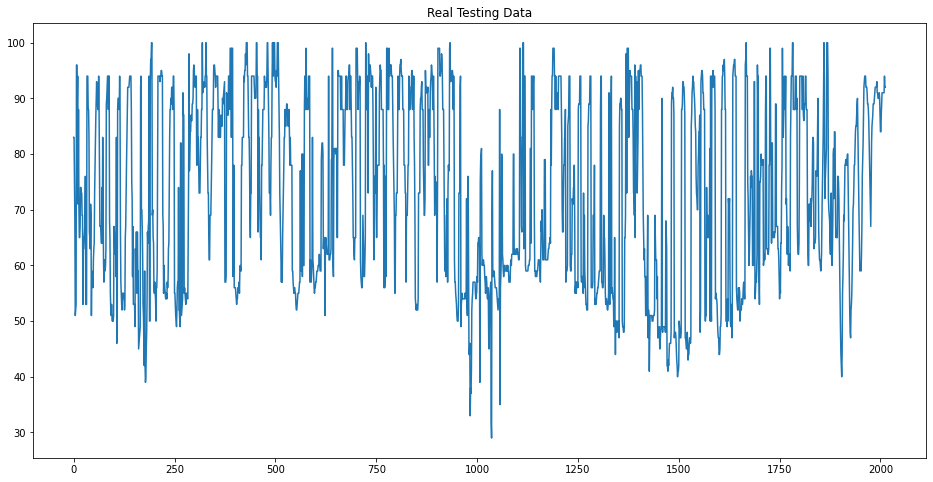

In [ ]:
pd.Series(humidity_seq_test).plot(title="Real Testing Data")

In [ ]:
print("Mean Squared Error", mean_squared_error(humidity_seq_test[2: ], humidity_testing_yhat))
print("Mean Absolute Error", mean_absolute_error(humidity_seq_test[2: ], humidity_testing_yhat))

Mean Squared Error 97.37471403282161
Mean Absolute Error 6.104887600504658


In [ ]:
humidity_model_obj.save_model("humidity_model_lstm.h5")

## **Wind Speed**

In [ ]:
wind_speed_model_obj = Model()
print(wind_speed_model_obj)
layers = [
      LSTM(1024, activation='relu', input_shape=(2, 1), return_sequences=True),
    #  LSTM(1024, activation='relu', return_sequences=True),
     # LSTM(512, activation='relu', return_sequences=True),
     # LSTM(256, activation='relu', return_sequences=True),
      #LSTM(128, activation='relu', return_sequences=True),
      LSTM(64, activation='relu', return_sequences=True),
      LSTM(32, activation='relu', return_sequences=False),
      #Dropout(0.5),
      Dense(1)
]
wind_speed_model = wind_speed_model_obj.create_model(layers=layers)
wind_speed_model_obj.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_89 (LSTM)              (None, 2, 1024)           4202496   
                                                                 
 lstm_90 (LSTM)              (None, 2, 256)            1311744   
                                                                 
 lstm_91 (LSTM)              (None, 2, 128)            197120    
                                                                 
 lstm_92 (LSTM)              (None, 2, 64)             49408     
                                                                 
 lstm_93 (LSTM)              (None, 32)                12416     
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,773,217
Trainable params: 5,773,217
N

In [ ]:
wind_speed_generator, wind_speed_validation_generator = create_generator(2, wind_speed_seq, wind_speed_seq_test, 16, 10)
wind_speed_model_obj.fit(wind_speed_generator, 10, 100, validation_generator=wind_speed_validation_generator)

Epoch 1/10
100/100 [==============================] - 11s 57ms/step - loss: 4.4602 - val_loss: 2.3421
Epoch 2/10
100/100 [==============================] - 5s 47ms/step - loss: 1.4914 - val_loss: 1.8004
Epoch 3/10
100/100 [==============================] - 4s 39ms/step - loss: 1.4293 - val_loss: 1.6361
Epoch 4/10
100/100 [==============================] - 4s 38ms/step - loss: 1.3774 - val_loss: 1.8909
Epoch 5/10
100/100 [==============================] - 4s 38ms/step - loss: 1.9887 - val_loss: 1.2131
Epoch 6/10
100/100 [==============================] - 4s 38ms/step - loss: 1.3215 - val_loss: 0.9662
Epoch 7/10
100/100 [==============================] - 4s 42ms/step - loss: 1.4150 - val_loss: 2.0630
Epoch 8/10
100/100 [==============================] - 4s 39ms/step - loss: 1.2602 - val_loss: 0.9740
Epoch 9/10
100/100 [==============================] - 4s 37ms/step - loss: 1.2966 - val_loss: 1.2681
Epoch 10/10
100/100 [==============================] - 4s 37ms/step - loss: 1.3614 - val_l

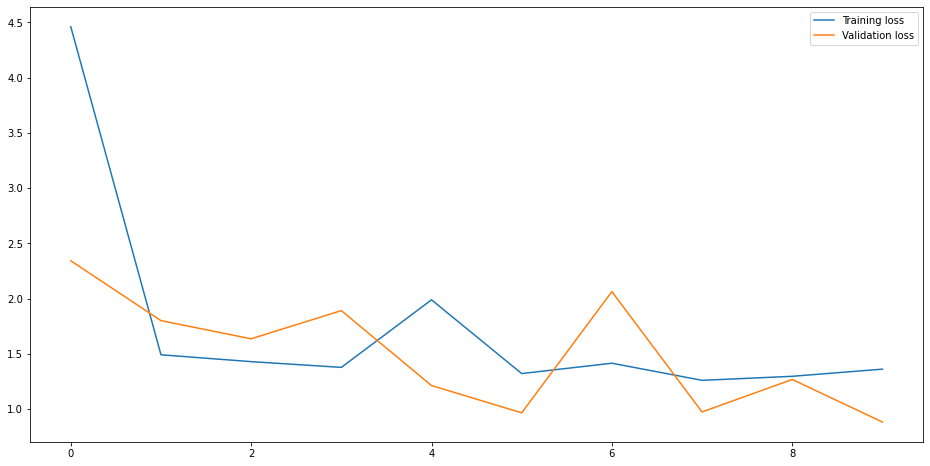

In [ ]:
wind_speed_model_obj.plot()

In [ ]:
# Prediction on Training Data

wind_speed_y_test = TimeseriesGenerator(wind_speed_seq, wind_speed_seq, length=2)
wind_speed_yhat = wind_speed_model_obj.predict(wind_speed_y_test)
wind_speed_yhat = wind_speed_yhat.reshape(len(wind_speed_yhat), )

[[1.1913131]
 [2.2235718]
 [3.0254714]
 ...
 [5.175722 ]
 [5.7045174]
 [5.175722 ]]


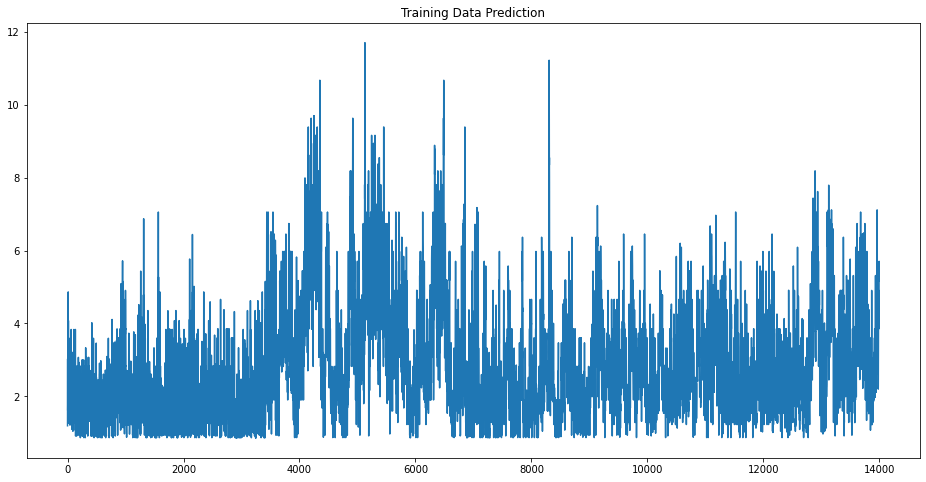

In [ ]:
pd.Series(wind_speed_yhat).plot(title="Training Data Prediction")

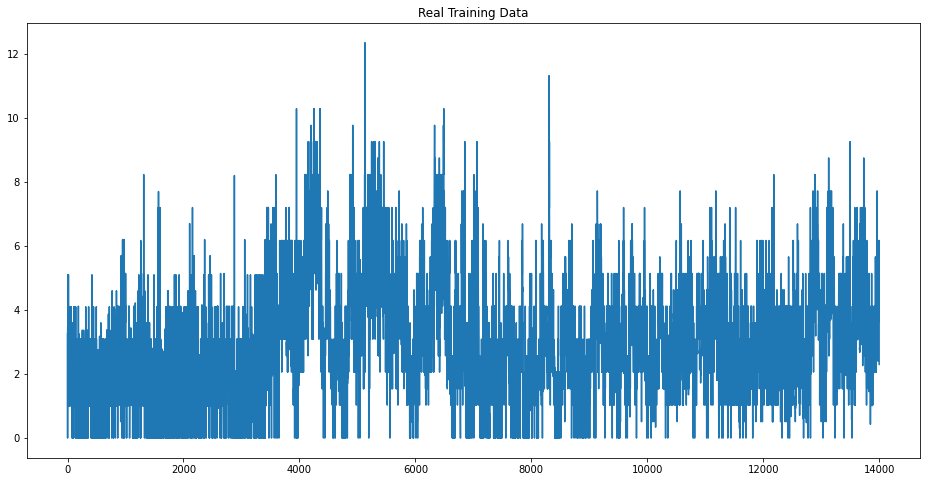

In [ ]:
pd.Series(wind_speed_seq).plot(title="Real Training Data")

In [ ]:
# Prediction on Testing Data 


wind_speed_testing_yhat = wind_speed_model_obj.predict(wind_speed_validation_generator)
wind_speed_testing_yhat = wind_speed_testing_yhat.reshape(len(wind_speed_testing_yhat), )

[[4.782048 ]
 [4.905649 ]
 [4.905649 ]
 ...
 [6.600236 ]
 [6.9921865]
 [7.1413527]]


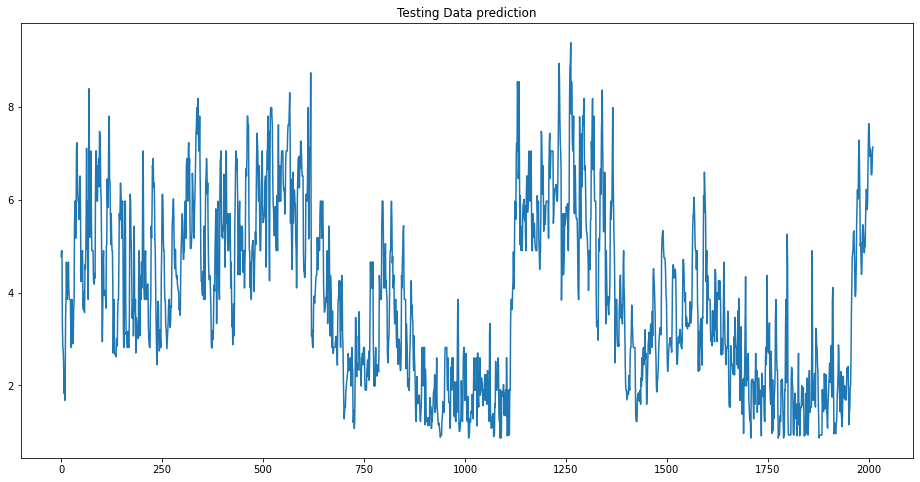

In [ ]:
pd.Series(wind_speed_testing_yhat).plot(title="Testing Data prediction")

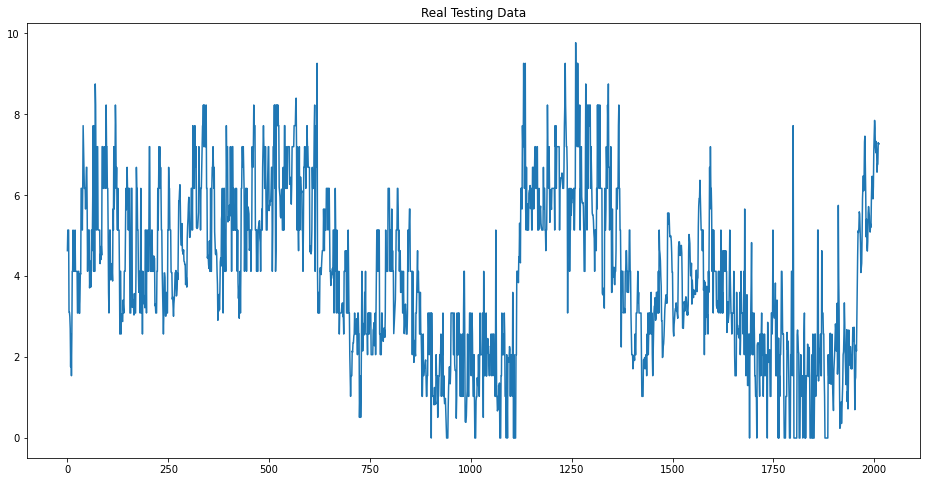

In [ ]:
pd.Series(wind_speed_seq_test).plot(title="Real Testing Data")

In [ ]:
print("Mean Absolute Error", mean_absolute_error(wind_speed_seq_test[2: ], wind_speed_testing_yhat))
print("Mean Squared Error", mean_squared_error(wind_speed_seq_test[2: ], wind_speed_testing_yhat))

Mean Absolute Error 0.6681702045075992
Mean Squared Error 0.8828736876449356


In [ ]:
wind_speed_model_obj.save_model("wind_speed_lstm_model.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/wind_speed_lstm_model.h5 /content/drive/MyDrive/time_series_project_models/
!cp /content/temperature_lstm.h5 /content/drive/MyDrive/time_series_project_models/
!cp /content/humidity_model_lstm.h5 /content/drive/MyDrive/time_series_project_models/
!cp /content/pressure_lstm_model.h5 /content/drive/MyDrive/time_series_project_models/
!cp /content/dew_point_model_lstm.h5 /content/drive/MyDrive/time_series_project_models/
!cp /content/wind_deg_model_lstm.h5 /content/drive/MyDrive/time_series_project_models/

## **Modelling the FBProphet Model**

[3.26 0.   2.75 ... 5.14 5.14 3.71]


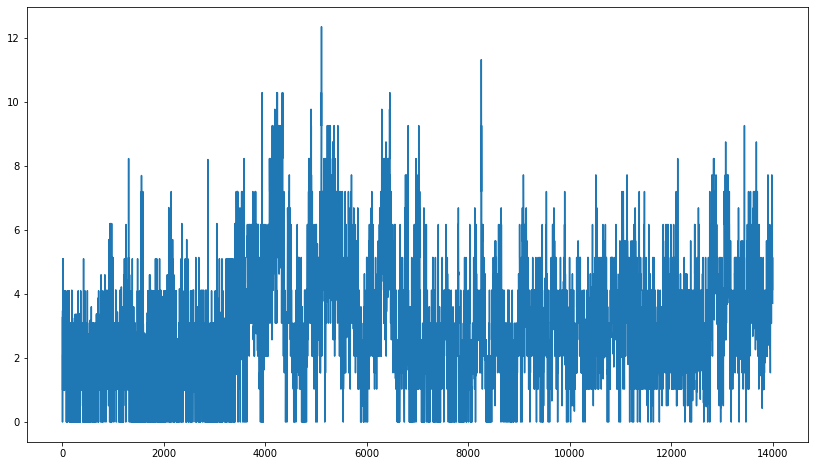

In [ ]:
# Wind Speed 

print(wind_speed_seq)
pd.Series(wind_speed_seq).plot(figsize=(14, 8))

In [ ]:
wind_speed_df = pd.DataFrame()
wind_speed_df["y"] = wind_speed_seq
wind_speed_df["ds"] = df.index[:14000]

In [ ]:
print(wind_speed_df)
wind_speed_df.info()

          y                  ds
0      3.26 2021-01-01 01:00:00
1      0.00 2021-01-01 02:00:00
2      2.75 2021-01-01 03:00:00
3      3.48 2021-01-01 04:00:00
4      1.00 2021-01-01 05:00:00
...     ...                 ...
13995  5.14 2022-06-24 20:00:00
13996  5.14 2022-06-24 21:00:00
13997  5.14 2022-06-24 22:00:00
13998  5.14 2022-06-24 23:00:00
13999  3.71 2022-06-25 00:00:00

[14000 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       14000 non-null  float64       
 1   ds      14000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 218.9 KB


In [ ]:
wind_speed_model = Prophet()

In [ ]:
wind_speed_model.fit(wind_speed_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = pd.DataFrame({"ds": df.index[14000:]})

In [ ]:
future

ds
0    2022-06-25 01:00:00
1    2022-06-25 02:00:00
2    2022-06-25 03:00:00
3    2022-06-25 04:00:00
4    2022-06-25 05:00:00
...                  ...
1924 2022-09-09 22:00:00
1925 2022-09-09 23:00:00
1926 2022-09-10 00:00:00
1927 2022-09-10 01:00:00
1928 2022-09-10 04:00:00

[1929 rows x 1 columns]

In [ ]:
forecasting_res = wind_speed_model.predict(future)

In [ ]:
forecasting_res

ds     trend  yhat_lower  yhat_upper  trend_lower  \
0    2022-06-25 01:00:00  3.609257    1.402303    5.081059     3.609257   
1    2022-06-25 02:00:00  3.609563    1.362739    5.015168     3.609563   
2    2022-06-25 03:00:00  3.609869    1.181020    5.042127     3.609869   
3    2022-06-25 04:00:00  3.610175    1.176072    5.043982     3.610175   
4    2022-06-25 05:00:00  3.610482    0.930165    4.723558     3.610482   
...                  ...       ...         ...         ...          ...   
1924 2022-09-09 22:00:00  4.173980    2.013010    6.555369     3.084755   
1925 2022-09-09 23:00:00  4.174286    1.967051    6.295405     3.084966   
1926 2022-09-10 00:00:00  4.174592    1.752379    6.244748     3.085176   
1927 2022-09-10 01:00:00  4.174898    1.648233    5.975736     3.085387   
1928 2022-09-10 04:00:00  4.175816    1.320166    5.735828     3.086019   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0        3.609257       -0.351257             -0.351257             -0.351257   
1        3.609563       -0.390554             -0.390554             -0.390554   
2        3.609869       -0.419222             -0.419222             -0.419222   
3        3.610175       -0.541001             -0.541001             -0.541001   
4        3.610482       -0.732492             -0.732492             -0.732492   
...           ...             ...                   ...                   ...   
1924     5.140134        0.087034              0.087034              0.087034   
1925     5.141357       -0.020951             -0.020951             -0.020951   
1926     5.142581       -0.213593             -0.213593             -0.213593   
1927     5.143805       -0.351257             -0.351257             -0.351257   
1928     5.147476       -0.541001             -0.541001             -0.541001   

         daily  daily_lower  daily_upper    weekly  weekly_lower  \
0    -0.344640    -0.344640    -0.344640 -0.006617     -0.006617   
1    -0.384478    -0.384478    -0.384478 -0.006076     -0.006076   
2    -0.413789    -0.413789    -0.413789 -0.005433     -0.005433   
3    -0.536290    -0.536290    -0.536290 -0.004711     -0.004711   
4    -0.728562    -0.728562    -0.728562 -0.003930     -0.003930   
...        ...          ...          ...       ...           ...   
1924  0.094458     0.094458     0.094458 -0.007424     -0.007424   
1925 -0.013640    -0.013640    -0.013640 -0.007311     -0.007311   
1926 -0.206557    -0.206557    -0.206557 -0.007035     -0.007035   
1927 -0.344640    -0.344640    -0.344640 -0.006617     -0.006617   
1928 -0.536290    -0.536290    -0.536290 -0.004711     -0.004711   

      weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
0        -0.006617                   0.0                         0.0   
1        -0.006076                   0.0                         0.0   
2        -0.005433                   0.0                         0.0   
3        -0.004711                   0.0                         0.0   
4        -0.003930                   0.0                         0.0   
...            ...                   ...                         ...   
1924     -0.007424                   0.0                         0.0   
1925     -0.007311                   0.0                         0.0   
1926     -0.007035                   0.0                         0.0   
1927     -0.006617                   0.0                         0.0   
1928     -0.004711                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  3.258000  
1                            0.0  3.219010  
2                            0.0  3.190647  
3                            0.0  3.069175  
4                            0.0  2.877989  
...                          ...       ...  
1924                         0.0  4.261014  
1925                         0.0  4.153335  
1926                         0.0  3.960999  
1927            

In [ ]:
wind_speed_yhat = forecasting_res.yhat

In [ ]:
wind_speed_yhat

0       3.258000
1       3.219010
2       3.190647
3       3.069175
4       2.877989
          ...   
1924    4.261014
1925    4.153335
1926    3.960999
1927    3.823641
1928    3.634816
Name: yhat, Length: 1929, dtype: float64

In [ ]:
wind_speed_seq_test

array([3.97, 4.37, 3.73, ..., 6.77, 7.3 , 7.27])

In [ ]:
from sklearn.metrics import mean_squared_error

print("Mean Squared Error", mean_squared_error(wind_speed_seq_test, wind_speed_yhat))

Mean Squared Error 4.232610256133549


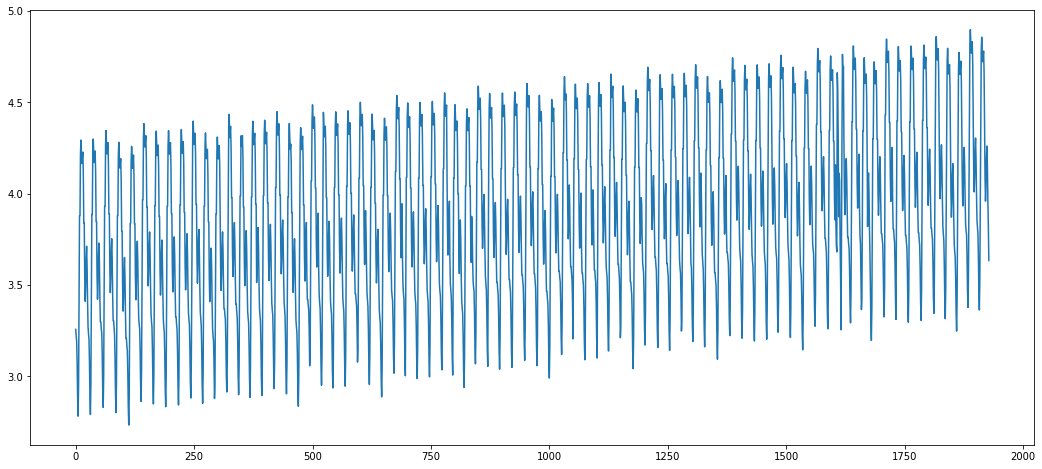

In [ ]:
pd.Series(wind_speed_yhat).plot(figsize=(18, 8))

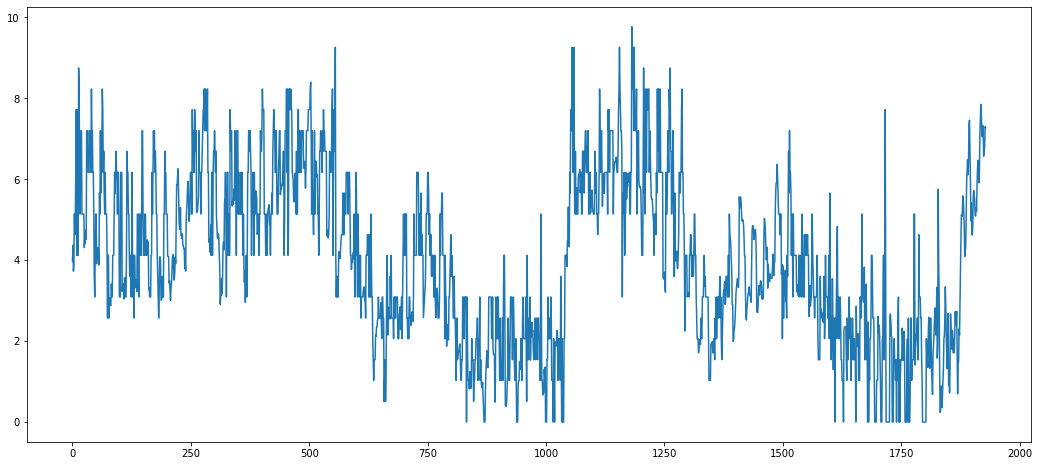

In [ ]:
pd.Series(wind_speed_seq_test).plot(figsize=(18, 8))

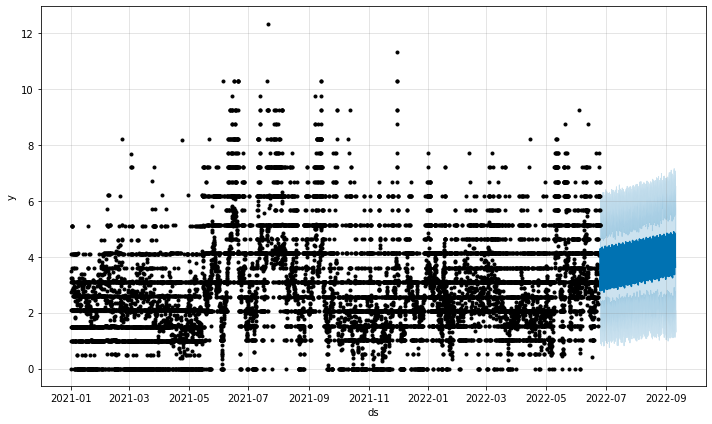

In [ ]:
wind_speed_model.plot(forecasting_res);

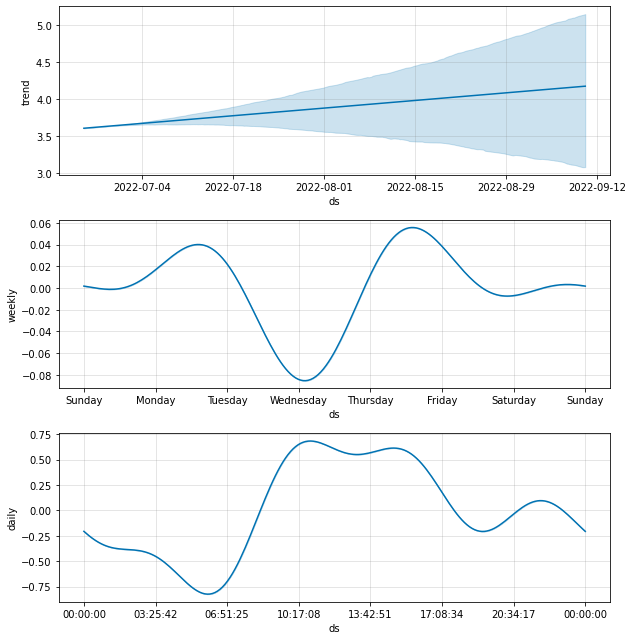

In [ ]:
wind_speed_model.plot_components(forecasting_res);

In [ ]:
plot_plotly(wind_speed_model, forecasting_res)

In [ ]:
plot_components_plotly(wind_speed_model, forecasting_res)

[1015 1013 1014 ... 1013 1012 1009]


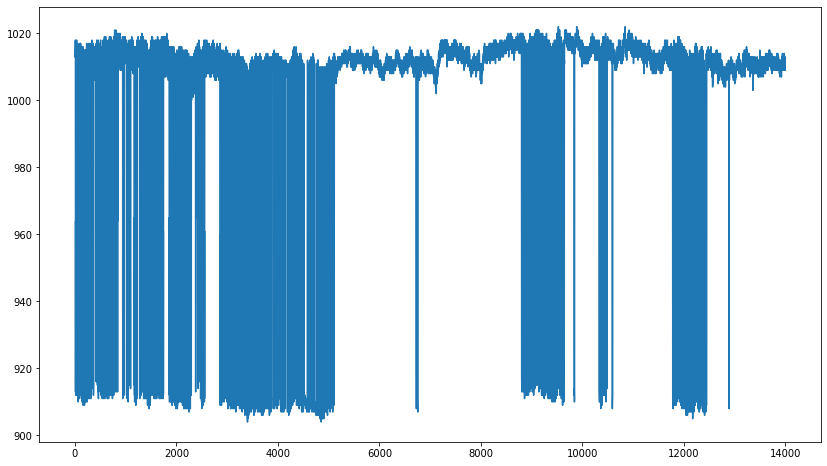

In [ ]:
# Pressure 

print(pressure_seq)
pd.Series(pressure_seq).plot(figsize=(14, 8))

In [ ]:
pressure_df = pd.DataFrame()
pressure_df["y"] = pressure_seq
pressure_df["ds"] = df.index[:14000]

In [ ]:
pressure_model = Prophet()

In [ ]:
pressure_model.fit(pressure_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
pressure_forecasted_res = pressure_model.predict(future)

In [ ]:
pressure_forecasted_res[pressure_forecasted_res.ds == "2022-09-09 01:00:00"]

ds        trend  yhat_lower   yhat_upper  trend_lower  \
1903 2022-09-09 01:00:00  1013.657056  927.115361  1136.738244   924.430967   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1903  1116.400347       15.909788             15.909788             15.909788   

         daily  daily_lower  daily_upper    weekly  weekly_lower  \
1903  14.62956     14.62956     14.62956  1.280228      1.280228   

      weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
1903      1.280228                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
1903                         0.0  1029.566843

In [ ]:
pressure_yhat = pressure_forecasted_res.yhat

In [ ]:
print("Mean Squared Error", mean_squared_error(pressure_yhat, pressure_seq_test))

Mean Squared Error 4179.128393178467


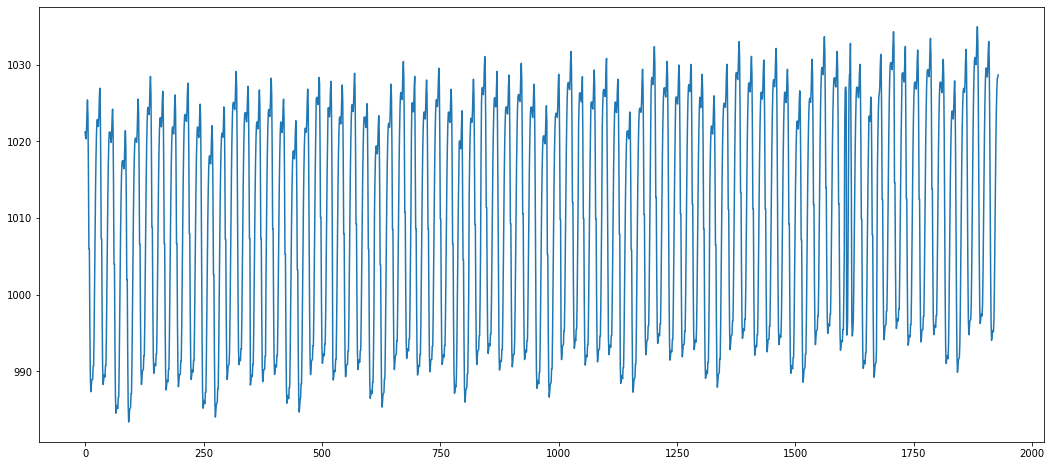

In [ ]:
pd.Series(pressure_yhat).plot(figsize=(18, 8))

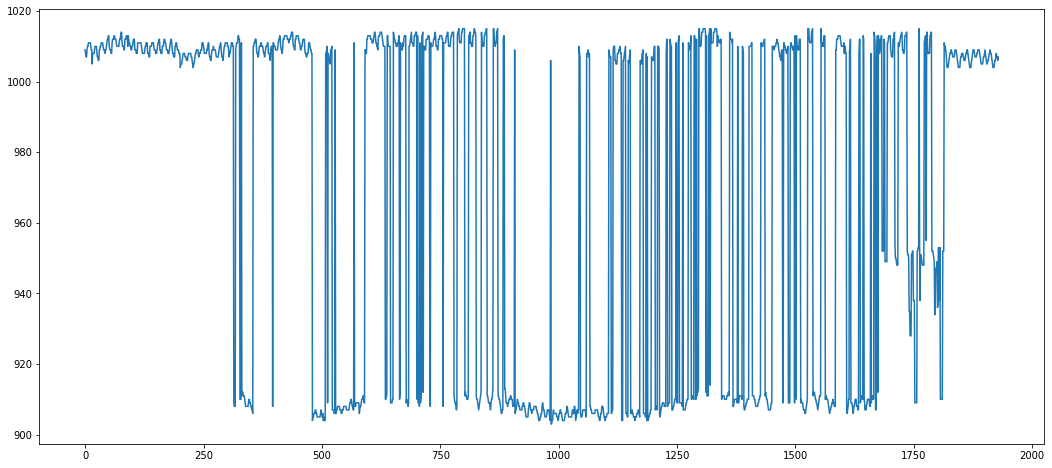

In [ ]:
pd.Series(pressure_seq_test).plot(figsize=(18, 8))

In [ ]:
model = load_model("/content/drive/MyDrive/time_series_project_models/temperature_lstm.h5")

In [ ]:
y_hat = model.predict(TimeseriesGenerator(pressure_seq_test, pressure_seq_test, length=6))
y_hat = y_hat.reshape(len(y_hat), )

In [ ]:
from tensorflow.keras.metrics import Accuracy

In [ ]:
m = Accuracy()
m.update_state(y_hat, df.pressure[14002: ])
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score,max_error, mean_absolute_error

mean_absolute_error(y_hat, df.temp[14006: ])


653.4116560750751

In [ ]:
y_hat

array([293.8258 , 294.01074, 294.19086, ..., 291.51715, 291.36658,
       291.30518], dtype=float32)

In [ ]:
from darts.models import NBEATSModel

In [ ]:
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
)

In [ ]:


model_nbeats.fit(data, verbose=True)

In [ ]:
data = pd.DataFrame(temp_seq)

In [ ]:
df["temp"]

dt
2021-01-01 01:00:00    291.23
2021-01-01 02:00:00    291.87
2021-01-01 03:00:00    291.25
2021-01-01 04:00:00    291.51
2021-01-01 05:00:00    290.70
                        ...  
2022-09-09 23:00:00    293.36
2022-09-10 00:00:00    293.36
2022-09-10 01:00:00    293.03
2022-09-10 04:00:00    293.10
2022-09-10 06:00:00    293.10
Name: temp, Length: 16013, dtype: float64

In [ ]:
from darts import TimeSeries

In [ ]:
series = TimeSeries.from_dataframe(df, col_name="temp", )

In [ ]:
df.set_index("dt", inplace=True)

In [ ]:
df.loc[~df.index.duplicated(), :]

sunrise      sunset    temp  feels_like  pressure  \
dt                                                                          
2021-01-01 01:00:00  1609463506  1609504453  291.23      291.60      1015   
2021-01-01 02:00:00  1609463506  1609504453  291.87      291.99      1013   
2021-01-01 03:00:00  1609463506  1609504453  291.25      291.54      1014   
2021-01-01 04:00:00  1609463506  1609504453  291.51      291.75      1014   
2021-01-01 05:00:00  1609463506  1609504453  290.70      290.94      1013   
...                         ...         ...     ...         ...       ...   
2022-09-09 23:00:00  1662683931  1662728144  293.36      293.81      1007   
2022-09-10 00:00:00  1662770331  1662814501  293.36      293.81      1007   
2022-09-10 01:00:00  1662770331  1662814501  293.03      293.53      1006   
2022-09-10 04:00:00  1662770331  1662814501  293.10      293.55      1007   
2022-09-10 06:00:00  1662770331  1662814501  293.10      293.55      1007   

                     humidity  dew_point  clouds  wind_speed  wind_deg  
dt                                                                      
2021-01-01 01:00:00        96     290.58      89        3.26        84  
2021-01-01 02:00:00        84     289.11      20        0.00         0  
2021-01-01 03:00:00        93     290.10     100        2.75        83  
2021-01-01 04:00:00        90     289.84     100        3.48        80  
2021-01-01 05:00:00        93     289.56      20        1.00        50  
...                       ...        ...     ...         ...       ...  
2022-09-09 23:00:00        91     291.84     100        6.77       232  
2022-09-10 00:00:00        91     291.84     100        6.77       232  
2022-09-10 01:00:00        94     292.04     100        7.30       229  
2022-09-10 04:00:00        92     291.76     100        7.27       234  
2022-09-10 06:00:00        92     291.76     100        7.27       234  

[14473 rows x 10 columns]

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.index = df.index.strftime('%s').astype("int")

In [ ]:
df

level_0  index      lat     lon      timezone  timezone_offset  \
dt                                                                           
1609462800        0      0  12.9989  77.592  Asia/Kolkata            19800   
1609466400        1      1  12.9989  77.592  Asia/Kolkata            19800   
1609470000        2      2  12.9989  77.592  Asia/Kolkata            19800   
1609473600        3      3  12.9989  77.592  Asia/Kolkata            19800   
1609477200        4      4  12.9989  77.592  Asia/Kolkata            19800   
...             ...    ...      ...     ...           ...              ...   
1662764400    16008  16008  12.9989  77.592  Asia/Kolkata            19800   
1662768000    16009  16009  12.9989  77.592  Asia/Kolkata            19800   
1662771600    16010  16010  12.9989  77.592  Asia/Kolkata            19800   
1662782400    16011  16011  12.9989  77.592  Asia/Kolkata            19800   
1662789600    16012  16012  12.9989  77.592  Asia/Kolkata            19800   

               sunrise      sunset    temp  feels_like  pressure  humidity  \
dt                                                                           
1609462800  1609463506  1609504453  291.23      291.60      1015        96   
1609466400  1609463506  1609504453  291.87      291.99      1013        84   
1609470000  1609463506  1609504453  291.25      291.54      1014        93   
1609473600  1609463506  1609504453  291.51      291.75      1014        90   
1609477200  1609463506  1609504453  290.70      290.94      1013        93   
...                ...         ...     ...         ...       ...       ...   
1662764400  1662683931  1662728144  293.36      293.81      1007        91   
1662768000  1662770331  1662814501  293.36      293.81      1007        91   
1662771600  1662770331  1662814501  293.03      293.53      1006        94   
1662782400  1662770331  1662814501  293.10      293.55      1007        92   
1662789600  1662770331  1662814501  293.10      293.55      1007        92   

            dew_point  clouds  wind_speed  wind_deg   id    main  \
dt                                                                 
1609462800     290.58      89        3.26        84  804  Clouds   
1609466400     289.11      20        0.00         0  801  Clouds   
1609470000     290.10     100        2.75        83  804  Clouds   
1609473600     289.84     100        3.48        80  804  Clouds   
1609477200     289.56      20        1.00        50  701    Mist   
...               ...     ...         ...       ...  ...     ...   
1662764400     291.84     100        6.77       232  804  Clouds   
1662768000     291.84     100        6.77       232  804  Clouds   
1662771600     292.04     100        7.30       229  500    Rain   
1662782400     291.76     100        7.27       234  500    Rain   
1662789600     291.76     100        7.27       234  500    Rain   

                description icon  
dt                                
1609462800  overcast clouds  04n  
1609466400       few clouds  02n  
1609470000  overcast clouds  04n  
1609473600  overcast clouds  04n  
1609477200             mist  50n  
...                     ...  ...  
1662764400  overcast clouds  04n  
1662768000  overcast clouds  04n  
1662771600       light rain  10n  
1662782400       light rain  10n  
1662789600       light rain  10d  

[16013 rows x 20 columns]